# Модель машинного обучения для покупки коров  владельцем молочного хозяйства «Вольный луг».

    Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
    Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
    Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

    С помощью модели нужно отобрать коров по двум критериям:
    - средний удой за год — не менее 6000 килограммов;
    - молоко должно быть вкусным.

## План работы с данными:
1. **Шаг 1. Загрузите и изучите данные:**
      1. Загрузим данные в датафреймы pandas.
      2. Изучим данные. Определим, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуем столбцы.
2. **Шаг 2. Предобработка данных:**
    - Проверим данные на наличие пропусков и дубликатов. Узнаем, корректны ли типы данных у каждого признака. При необходимости устраним все проблемы с данными.
3. **Шаг 3. Исследовательский анализ данных:**
    1. Проведем статистический анализ всех признаков.
    2. Построем графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
    3. Сделаем выводы.
4. **Шаг 4. Проведем корреляционный анализ признаков в датасете ferma_main.csv:**
    1. Изучим взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
    2. Построем диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учтем, что виды связи в подгруппах могут различаться — например, для разных пород.
    3. Сделайем выводы о взаимосвязи признаков:
        - Какой тип взаимосвязи между целевым и входными признаками?
        - Есть ли нелинейные связи между целевым и входными признаками?
        - Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
        - Наблюдается ли мультиколлинеарность между входными признаками?
5. **Шаг 5. Задача регрессии:**
    1. Подготовим данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
        - Используем в качестве целевого признак Удой, кг.
        - Отберем признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
        - Разобьем данные на тренировочную и тестовую выборки.
        - Кодируем категориальные признаки с помощью OneHotEncoder.
        - Масштабируем количественные признаки с помощью StandardScaler.
        - Обучим модель линейной регрессии на подготовленных данных.
        - Оценим качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
        - Оформим выводы, укажите:
            - значение R² модели;
            - какие выводы следуют из анализа остатков;
            - нужны ли дополнительные исследования.
    2. Подготовим данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
        - Посмотрим на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
            - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
            - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
        - Повторим шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
     3. Добавим в данные новый признак и обучите на них третью модель LinearRegression.
         - Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
         - Устраним нелинейность между признаками.
         - Повторим шаги из пункта 1 и создадим третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
     4. Сравним качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
     5. Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используем функции для расчёта метрик. Укажим:
         - лучшую модель;
         - доверительный интервал прогноза лучшей модели.
     6. С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
         - Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%.
         - Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
         - Получим прогноз удоя коров.
6. **Шаг 6. Задача классификации:**
    1. Подготовим данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
        - Использем в качестве целевого признак Вкус молока.
        - При необходимости преобразуем имеющиеся или добавим новые признаки.
        - Разобьем данные на тренировочную и тестовую выборки.
        - Кодируем категориальные признаки с помощью OneHotEncoder.
        - Масштабируем количественные признаки с помощью StandardScaler.
        - Обучим модель логистической регрессии на подготовленных данных.
        - Оценим качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
        - Построим матрицу ошибок.
    2. Проанализируем модель логистической регрессии.
        - Объясним, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
        - Сведем критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
        - Оформим выводы: скажите, что нужно сделать дальше, исходя из анализа модели?
    3. С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
        - Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
        - Получим прогноз вкуса молока коров.
7. **Шаг 7. Сделаем итоговые выводы**
    - Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
    - Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
    - Коротко опишем результаты работы моделей для фермера.
        - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
        - Какие ещё рекомендации можно ему дать?
    - Сделаем выводы о моделях линейной регрессии и логистической регрессии.
        - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
        - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
        - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

## Загрузка данных

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from math import sqrt
import plotly.express as px
from scipy.stats import binom, poisson
from math import factorial
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import phik
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    mean_squared_error,
    mean_absolute_error,
    recall_score
)

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
try:
    ferma = pd.read_csv('C:/Users/almuc/Downloads/ferma_main.csv', sep=';', decimal = ',')
    dad = pd.read_csv('C:/Users/almuc/Downloads/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('C:/Users/almuc/Downloads/cow_buy.csv', sep=';', decimal = ',')
except:
    ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
    dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')

In [5]:
ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [6]:
ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

В таблице 634 строки и 12 столбцов, пропусков нет.

In [7]:
dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В таблице 629 строк и 2 столбца. Пропусков нет.

In [9]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [10]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


В таблице 20 строк и 7 столбцов. Пропусков нет.

**Приведем к нижнему регистру все названия столбцов.**

In [11]:
ferma.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [12]:
ferma.columns = map(str.lower, ferma.columns)

In [13]:
ferma.sample(5)

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
542,543,6670,14.5,1769,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.73,3.076,не вкусно,более_2_лет
286,287,6679,15.7,2267,0.95,Вис Бик Айдиал,Холмистое,Соверин,3.31,3.074,вкусно,более_2_лет
527,528,6890,15.9,2164,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.072,вкусно,более_2_лет
601,602,6188,13.7,1744,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.64,3.079,вкусно,более_2_лет
331,332,6509,15.2,1814,0.93,РефлешнСоверинг,Равнинное,Айдиал,3.72,3.072,вкусно,более_2_лет


В ходе анализа, было выяснено, что имеются ошибки в заполнении данных. Приведем данные к единому формату

In [14]:
ferma['тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [15]:
ferma['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [16]:
ferma['тип пастбища'] = ferma['тип пастбища'].str.replace('ы', 'о')

In [17]:
ferma['порода папы_быка'] = ferma['порода папы_быка'].str.replace('лл', 'л')

In [18]:
ferma['тип пастбища'] = ferma['тип пастбища'].str.lower()

Проверяем полученные данные.

In [19]:
ferma['тип пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [20]:
ferma['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Приведем данные к логическому порядку столбцов.

In [21]:
ferma.columns

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

In [22]:
ferma = ferma[['id', 'порода', 'тип пастбища', 'возраст', 'порода папы_быка', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)',
        'жирность,%', 'белок,%', 'удой, кг', 'вкус молока']]

In [23]:
ferma.head()

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
0,1,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863,вкусно
1,2,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529,вкусно
2,3,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810,не вкусно
3,4,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895,не вкусно
4,5,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302,вкусно


In [24]:
dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [25]:
dad.columns = map(str.lower, dad.columns)

Переименуем столбец с именем папы в соответствии со змеиным регистром.

In [26]:
dad.rename(columns={'имя папы' : 'имя_папы'}, inplace=True)

In [27]:
dad.sample(5)

,id,имя_папы
165,166,Соловчик
106,107,Барин
369,370,Барин
518,519,Барин
262,263,Геркулес


In [28]:
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

Приведем названия столбцов к строчному формату.

In [29]:
cow_buy.columns = map(str.lower, cow_buy.columns)

In [30]:
cow_buy.sample(5)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет


Теперь нам необходимо заменить в df cow_buy названия столбцов текущая_жирность,% текущий_уровень_белок,%, на названия в df ferma жирность,%, белок,%.

In [31]:
cow_buy.rename(columns={'текущая_жирность,%' : 'жирность,%'}, inplace=True)
cow_buy.rename(columns={'текущий_уровень_белок,%' : 'белок,%'}, inplace=True)

In [32]:
cow_buy.tail()

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Также произведем замену запятых на точки.

    В первой таблице представлены данные о коровах в настоящее время на ферме, на текущий момент 634 коровы. Также в ней указаны такие показатели как удой, ЭКЕ (Энергетическая кормовая единица), сырой протеин, СПО (Сахаро-протеиновое соотношение), порода коровы, тип пастбища, порода папы_быка, Жирность,%, Белок,%, вкус молока, и возраст коровы.
    Во второй таблице вывыдены отдельно данные по имени папы коровы, данные не сопадают, т.к. всего 629 строк. Нужно будет провести анализ потерянных 5 коров.
    В третьей таблице предоставленны данные, о коровах на продажу компанией ЭКО. Всего 20 коров, с описанием породы, типа пастбища,	породы папы_быка, именем папы, жирность,%, белок,% и возрастом коровы.

##  Предобработка данных

Проведем проверку данных на наличие пропусков и дубликатов.

**Считаем количество пропущенных значений**

In [33]:
ferma.isna().sum()

id                                       0
порода                                   0
тип пастбища                             0
возраст                                  0
порода папы_быка                         0
эке (энергетическая кормовая единица)    0
сырой протеин, г                         0
спо (сахаро-протеиновое соотношение)     0
жирность,%                               0
белок,%                                  0
удой, кг                                 0
вкус молока                              0
dtype: int64

In [34]:
dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [35]:
cow_buy.isna().sum()

порода              0
тип пастбища        0
порода папы_быка    0
имя_папы            0
жирность,%          0
белок,%             0
возраст             0
dtype: int64

Пропусков в данных нет.

**Посчитаем наличие дубликатов.**

In [36]:
print('Количество явных дубликатов на ферме', ferma.duplicated().sum())

Количество явных дубликатов на ферме 5


Удаляем явные дубликаты.

In [37]:
ferma = ferma.drop_duplicates()

Проверяем наличие дубликатов

In [38]:
print('Количество явных дубликатов на ферме', ferma.duplicated().sum())

Количество явных дубликатов на ферме 0


In [39]:
print('Количество явных дубликатов именах отцов коров', dad.duplicated().sum())

Количество явных дубликатов именах отцов коров 0


In [40]:
print('Количество явных дубликатов в данных о коровах для покупки', cow_buy.duplicated().sum())

Количество явных дубликатов в данных о коровах для покупки 4


Удаляем дубликаты.

**Проверим типы данных**

In [41]:
ferma.head(1)

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
0,1,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.89,3.58,3.076,5863,вкусно


In [42]:
ferma.dtypes

id                                         int64
порода                                    object
тип пастбища                              object
возраст                                   object
порода папы_быка                          object
эке (энергетическая кормовая единица)    float64
сырой протеин, г                           int64
спо (сахаро-протеиновое соотношение)     float64
жирность,%                               float64
белок,%                                  float64
удой, кг                                   int64
вкус молока                               object
dtype: object

Заменим значения в столбцах следующим образом:
1. эке (энергетическая кормовая единица) на float32,
2. спо (сахаро-протеиновое соотношение)	на float32,
6. жирность,% на float32,
7. белок,% на float32.

In [43]:
ferma['эке (энергетическая кормовая единица)'] = ferma['эке (энергетическая кормовая единица)'].astype('float32')
ferma['спо (сахаро-протеиновое соотношение)'] = ferma['спо (сахаро-протеиновое соотношение)'].astype('float32')
ferma['жирность,%'] = ferma['жирность,%'].astype('float32')
ferma['белок,%'] = ferma['белок,%'].astype('float32')

Проверяем данные

In [44]:
ferma.head()

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
0,1,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863,вкусно
1,2,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529,вкусно
2,3,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810,не вкусно
3,4,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895,не вкусно
4,5,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302,вкусно


In [45]:
ferma.dtypes

id                                         int64
порода                                    object
тип пастбища                              object
возраст                                   object
порода папы_быка                          object
эке (энергетическая кормовая единица)    float32
сырой протеин, г                           int64
спо (сахаро-протеиновое соотношение)     float32
жирность,%                               float32
белок,%                                  float32
удой, кг                                   int64
вкус молока                               object
dtype: object

Отлично! Все получилось.

In [46]:
dad.dtypes

id           int64
имя_папы    object
dtype: object

В датафрейме с именем папы коровы ничего менять не нужно.

In [47]:
cow_buy.dtypes

порода               object
тип пастбища         object
порода папы_быка     object
имя_папы             object
жирность,%          float64
белок,%             float64
возраст              object
dtype: object

In [48]:
cow_buy.head(1)

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет


In [49]:
cow_buy['белок,%'].unique()

array([3.076, 3.081, 3.074, 3.061, 3.053, 3.079, 3.055, 3.073, 3.046,
       3.075, 3.065, 3.069])

В датафрейме cow_buy нужно поменять следующие данные:
1. жирность,% на float32,
2. белок,% на float32.

In [50]:
cow_buy['жирность,%'] = cow_buy['жирность,%'].astype('float32')
cow_buy['белок,%'] = cow_buy['белок,%'].astype('float32')

In [51]:
cow_buy.dtypes

порода               object
тип пастбища         object
порода папы_быка     object
имя_папы             object
жирность,%          float32
белок,%             float32
возраст              object
dtype: object

Создадим новый датафрейм, в нем мы будем сохранять результат прогноза.

In [52]:
cow_buy_result = cow_buy.copy()

По итогам предобработки данных можно сделать слеующие выводы:
1. Явных дубликатов было 9, из которых 5 в данных о коровах на ферме, и 4 о коровах у заводчика "Эко". Дубликаты были удалены.
2. был изменен тип данных на float32. Данная проблема образовалась из-за того, что данные были подготовлены некорректно, и использовалась запятая вместо точки.

## Исследовательский анализ данных

Построим таблицу со статистическими данными.

In [53]:
ferma.describe()

,id,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,14.543879,1923.364070,0.913116,3.603657,3.075671,6188.750397
std,181.72094,1.306408,182.956251,0.032203,0.168656,0.002549,1644.795489
min,1.00000,10.900000,1660.000000,0.840000,2.990000,3.069000,5204.000000
25%,158.00000,13.500000,1771.000000,0.890000,3.590000,3.074000,5751.000000
50%,315.00000,14.700000,1888.000000,0.930000,3.650000,3.076000,6133.000000
75%,472.00000,15.600000,2062.000000,0.940000,3.720000,3.077000,6501.000000
max,629.00000,16.799999,2349.000000,0.960000,3.750000,3.085000,45616.000000


Из всех данных наиболее выделяется столбец удой,кг. 1  корова не может давать столько молока. Посмотрим на рекорсмена.

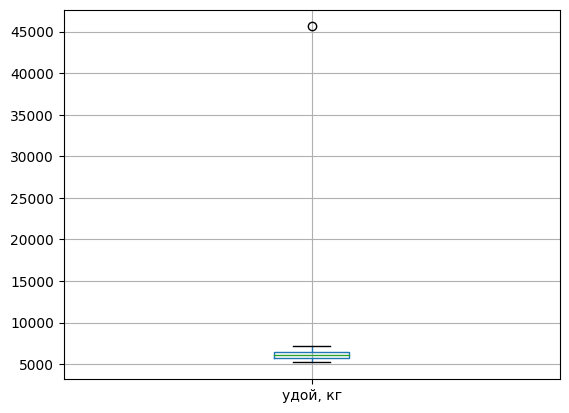

In [54]:
ferma.boxplot('удой, кг')
plt.show()

In [55]:
record = ferma[ferma['удой, кг'] >= 7500]
record.head()

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
16,17,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,11.5,1675,0.93,3.22,3.076,45616,вкусно


Мировой рекорд составил 30805 кг. коровой Джулианой в 2004 году. http://www.bolshoyvopros.ru/questions/501674-kakoj-mirovoj-rekord-po-nadoju-moloka-ot-odnoj-korovy.html#:~:text=Так%20рекорд%20по%20надою%20считается,1981%20г.%20с%2027674%20кг С учетом, что на ферме больше 7500 кг. только 1 корова, думаю это ошибка заполнения данных. Во избежания ошибки прогнозирования эту строку нужно удалить.

In [56]:
ferma = ferma.drop(16)

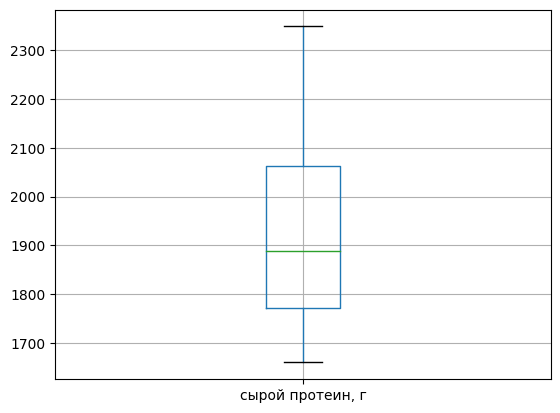

In [57]:
ferma.boxplot('сырой протеин, г')
plt.show()

In [58]:
protein = ferma[ferma['сырой протеин, г'] >= 2200]
protein

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
11,12,Вис Бик Айдиал,холмистое,более_2_лет,Соверин,16.500000,2328,0.93,3.71,3.075,6563,вкусно
27,28,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,16.400000,2303,0.95,3.70,3.077,7028,вкусно
37,38,РефлешнСоверинг,равнинное,более_2_лет,Айдиал,14.200000,2269,0.93,3.72,3.076,6016,не вкусно
58,59,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,14.800000,2264,0.93,3.53,3.081,6274,вкусно
66,67,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,14.600000,2327,0.93,3.71,3.077,6006,вкусно
...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,Вис Бик Айдиал,равнинное,более_2_лет,Соверин,15.500000,2330,0.95,3.73,3.078,6452,не вкусно
549,550,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,16.299999,2339,0.94,3.71,3.080,6844,вкусно
593,594,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,16.700001,2318,0.95,3.72,3.074,7174,вкусно
598,599,РефлешнСоверинг,холмистое,более_2_лет,Соверин,16.400000,2309,0.94,3.72,3.076,6584,вкусно


Вероятно данные коровы получают какой-то специальный корм. Оставим все как есть.

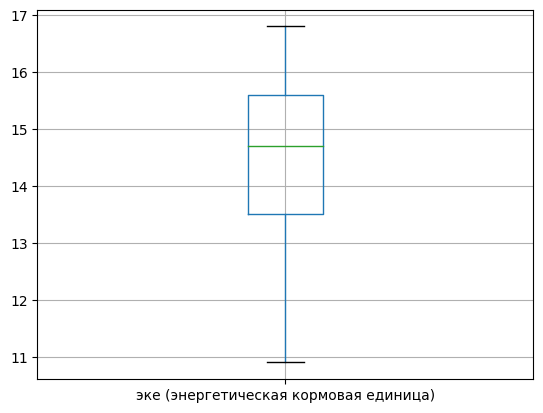

In [59]:
ferma.boxplot('эке (энергетическая кормовая единица)')
plt.show()

In [60]:
food = ferma[ferma['эке (энергетическая кормовая единица)'] <= 11.7]
food

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
456,457,РефлешнСоверинг,равнинное,менее_2_лет,Соверин,11.1,1925,0.88,3.33,3.074,5288,не вкусно
576,577,РефлешнСоверинг,равнинное,менее_2_лет,Соверин,11.7,1825,0.86,2.99,3.076,5376,не вкусно
581,582,Вис Бик Айдиал,холмистое,менее_2_лет,Соверин,10.9,1955,0.84,3.39,3.079,5573,вкусно


Удалим все значения эке меньше 11.7

In [61]:
ferma = ferma[ferma['эке (энергетическая кормовая единица)'] >= 11.7]

In [62]:
ferma.describe()

,id,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,314.822684,14.560065,1923.707668,0.913259,3.605048,3.075668,6128.190096
std,181.363076,1.288249,183.120837,0.032112,0.167783,0.002551,474.917735
min,1.000000,11.700000,1660.000000,0.840000,2.990000,3.069000,5204.000000
25%,158.250000,13.500000,1771.250000,0.890000,3.590000,3.074000,5751.750000
50%,314.500000,14.700000,1885.500000,0.930000,3.650000,3.076000,6133.000000
75%,471.750000,15.600000,2062.750000,0.940000,3.720000,3.077000,6501.000000
max,629.000000,16.799999,2349.000000,0.960000,3.750000,3.085000,7222.000000


Теперь наши данные больше похожи на правду. Посмотрим данные по коровам от фирмы "ЭКО".

In [63]:
cow_buy.describe()

,"жирность,%","белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Все в пределах разумного, оставим данные как есть.

Для начала нам необходимо посмотреть соотношение количества коров разных пород на ферме.

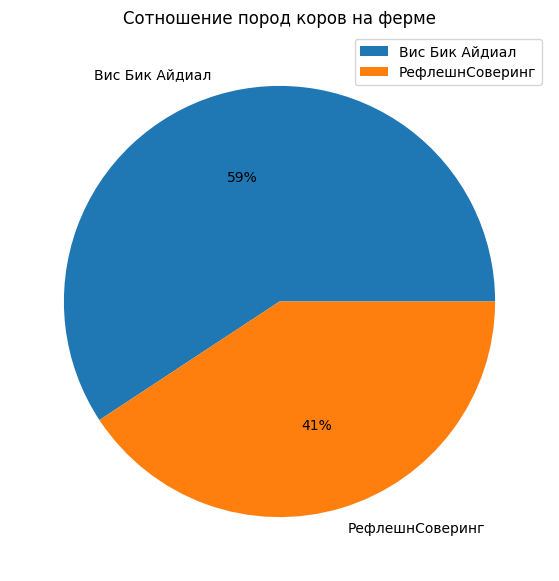

In [64]:
ferma.pivot_table(index='порода',values='id',aggfunc='count') \
  .plot.pie(y='id', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Сотношение пород коров на ферме")
plt.show()

Как мы видим на ферме преобладают коровы породы Вис Бик Айдиал, они занимают 59 % стада.

Теперь построи гистограмму рассеивания по удоям.

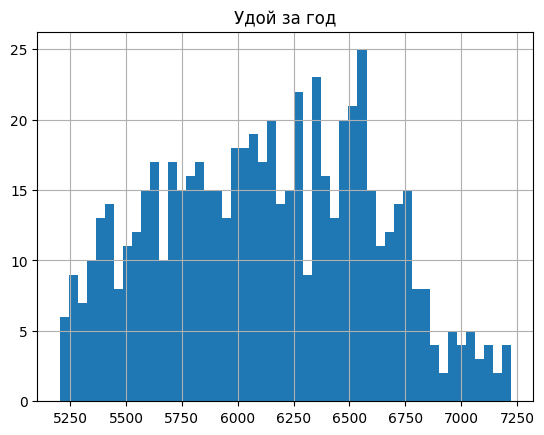

In [65]:
ferma['удой, кг'].hist(bins=50);
plt.title("Удой за год")
plt.show()

Как мы видим, наибольшее количество коров дает удой в пределах от 5900 до 6600 кг. молока в год.

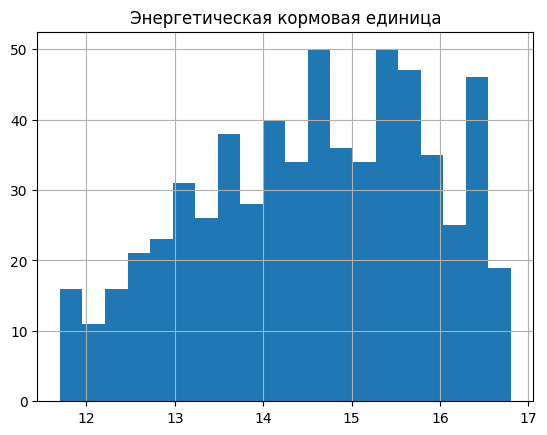

In [66]:
ferma['эке (энергетическая кормовая единица)'].hist(bins=20);
plt.title("Энергетическая кормовая единица")
plt.show()

Наибольшая количество коров получают энергетическую кормовую единицу в пределах от 14,1 до 15,9 единиц.

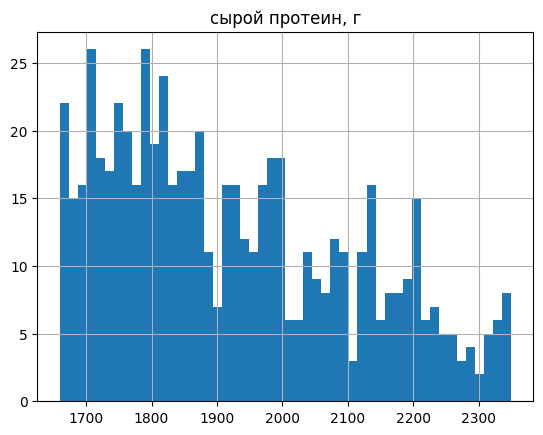

In [67]:
ferma['сырой протеин, г'].hist(bins=50);
plt.title("сырой протеин, г")
plt.show()

В среднем наибольшее количество коров дает молоко с показателем сырого протеина в пределах от  1700 до 1890 гр. 

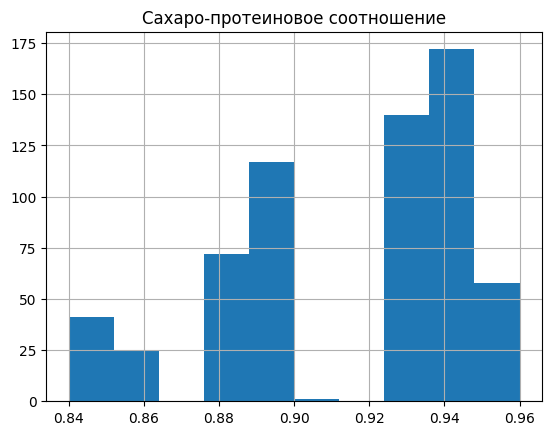

In [68]:
ferma['спо (сахаро-протеиновое соотношение)'].hist();
plt.title("Сахаро-протеиновое соотношение")
plt.show()

Данные распределены на 2 группы до 0,92 и выше 0,92. В дальнейшем проведем бинарное кодирование этого признака.

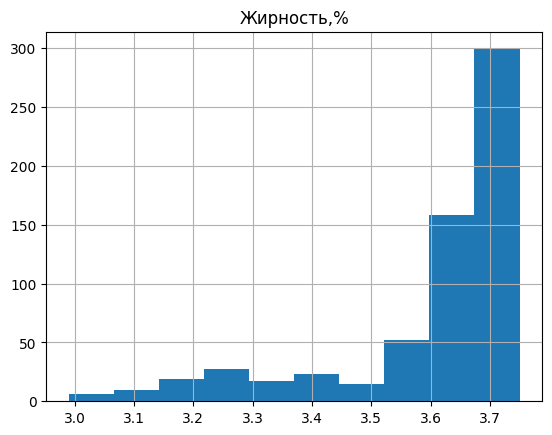

In [69]:
ferma['жирность,%'].hist();
plt.title("Жирность,%")
plt.show()

Наибольшее количество коров дает молоко с жирностью от 3,6 до 3,7 %. Что является нормой для коровьего молока.

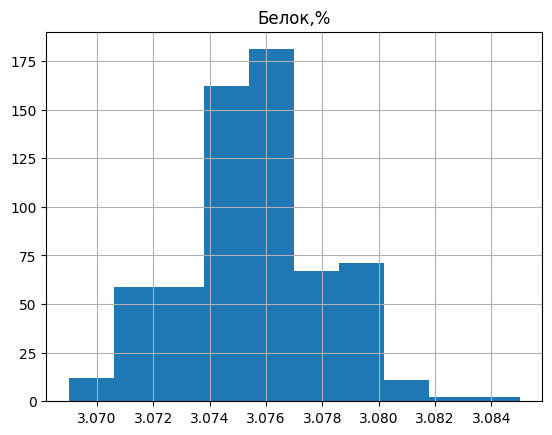

In [70]:
ferma['белок,%'].hist();
plt.title("Белок,%")
plt.show()

Большинство полученного молока имеет жирность от 3,074 до 3,077 %. Что тоже является нормой.

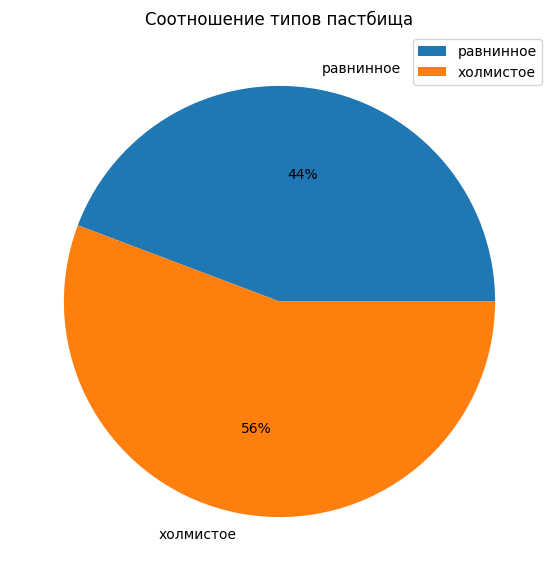

In [71]:
ferma.pivot_table(index='тип пастбища',values='id',aggfunc='count') \
  .plot.pie(y='id', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Соотношение типов пастбища")
plt.show()

Большинство коров пасется на холмистой местности.

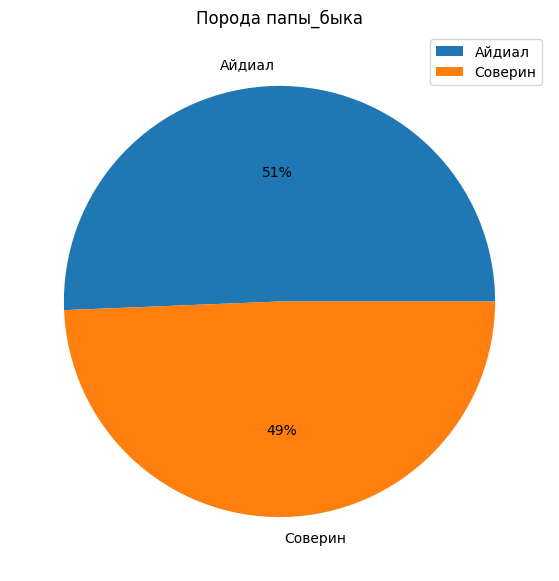

In [72]:
ferma.pivot_table(index='порода папы_быка',values='id',aggfunc='count') \
  .plot.pie(y='id', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Порода папы_быка")
plt.show()

Порода папы коровы распределена поровну.

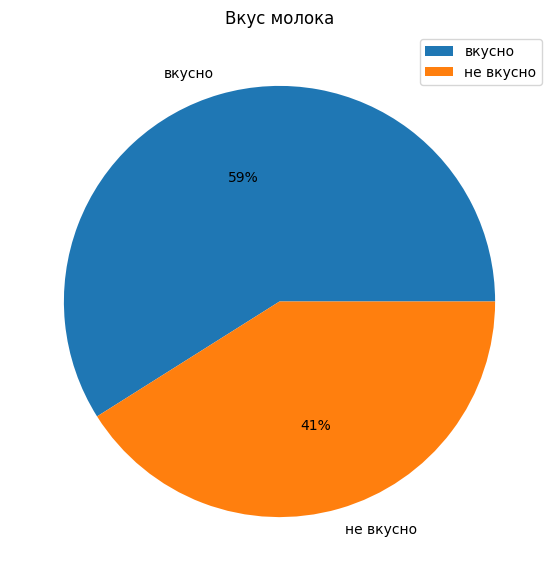

In [73]:
ferma.pivot_table(index='вкус молока',values='id',aggfunc='count') \
  .plot.pie(y='id', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Вкус молока")
plt.show()

59 % от выпущенного молока считается вкусным, непонятно правда по каким критериям этот показатель расчитывается, но если оно оценивается только человеком, то данный критерий вообще сугубо индивидуален и зависит от оценщика.

Чтобы повысить вкус молока нужно соблюдать требования кормления, чистоты коровника, чистоты дойки и правильность транспортировки, а также следить за здоровьем животного. https://ferma.expert/jivotnie/krs/moloko/vkus/

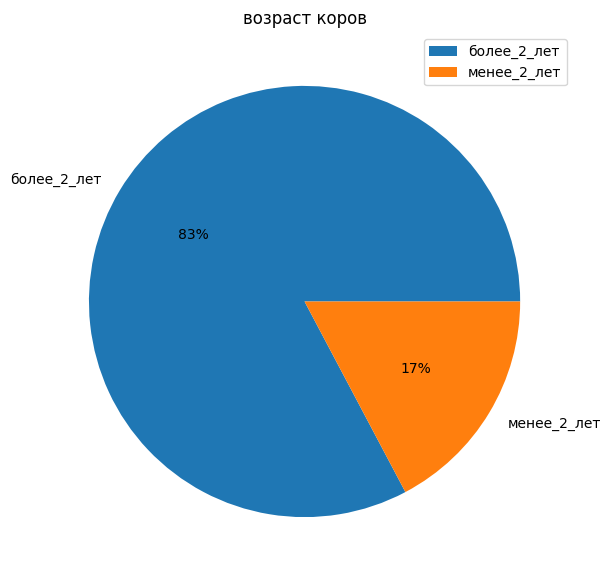

In [74]:
ferma.pivot_table(index='возраст',values='id',aggfunc='count') \
  .plot.pie(y='id', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("возраст коров")
plt.show()

На данном графике все понятно, т.к. коровы редко телятся до 2-х лет, а нет телят нет и молока.

По истогам исследовательского анализа данных можно сделать следующие выводы:
1. В данных по удою был один выброс, корова по данным давала 45616 кг. молока в год, т.к. мы не можем предположить какое количество молока она дала эту строку мы удалим.
2. На ферме преобладают коровы породы Вис Бик Айдиал, они занимают 59 % стада.
3. Наибольшее количество коров дает удой в пределах от 5900 до 6600 кг. молока в год.
4. Наибольшая количество коров получают энергетическую кормовую единицу в пределах от 14,1 до 15,9 единиц.
5. В среднем наибольшее количество коров дает молоко с показателем сырого протеина в пределах от 1700 до 1890 гр.
6. У наибольшего числа коров сахарно-протеиновое соотношение в пределах 0,93-0,95.
7. Наибольшее количество коров дает молоко с жирностью от 3,6 до 3,7 %. Что является нормой для коровьего молока.
8. Большинство полученного молока имеет жирность от 3,074 до 3,077 %. Что тоже является нормой.
9. Большинство коров пасется на холмистой местности.
10. Порода папы коровы распределена поровну.
11. 59 % от выпущенного молока считается вкусным.
12. 82 %. коров в возврасте более 2-х лет, коровы редко телятся до 2-х лет, а нет телят нет и молока.

## Корреляционный анализ

Построим матрицу корелляции и выведем данные в табличной форме.

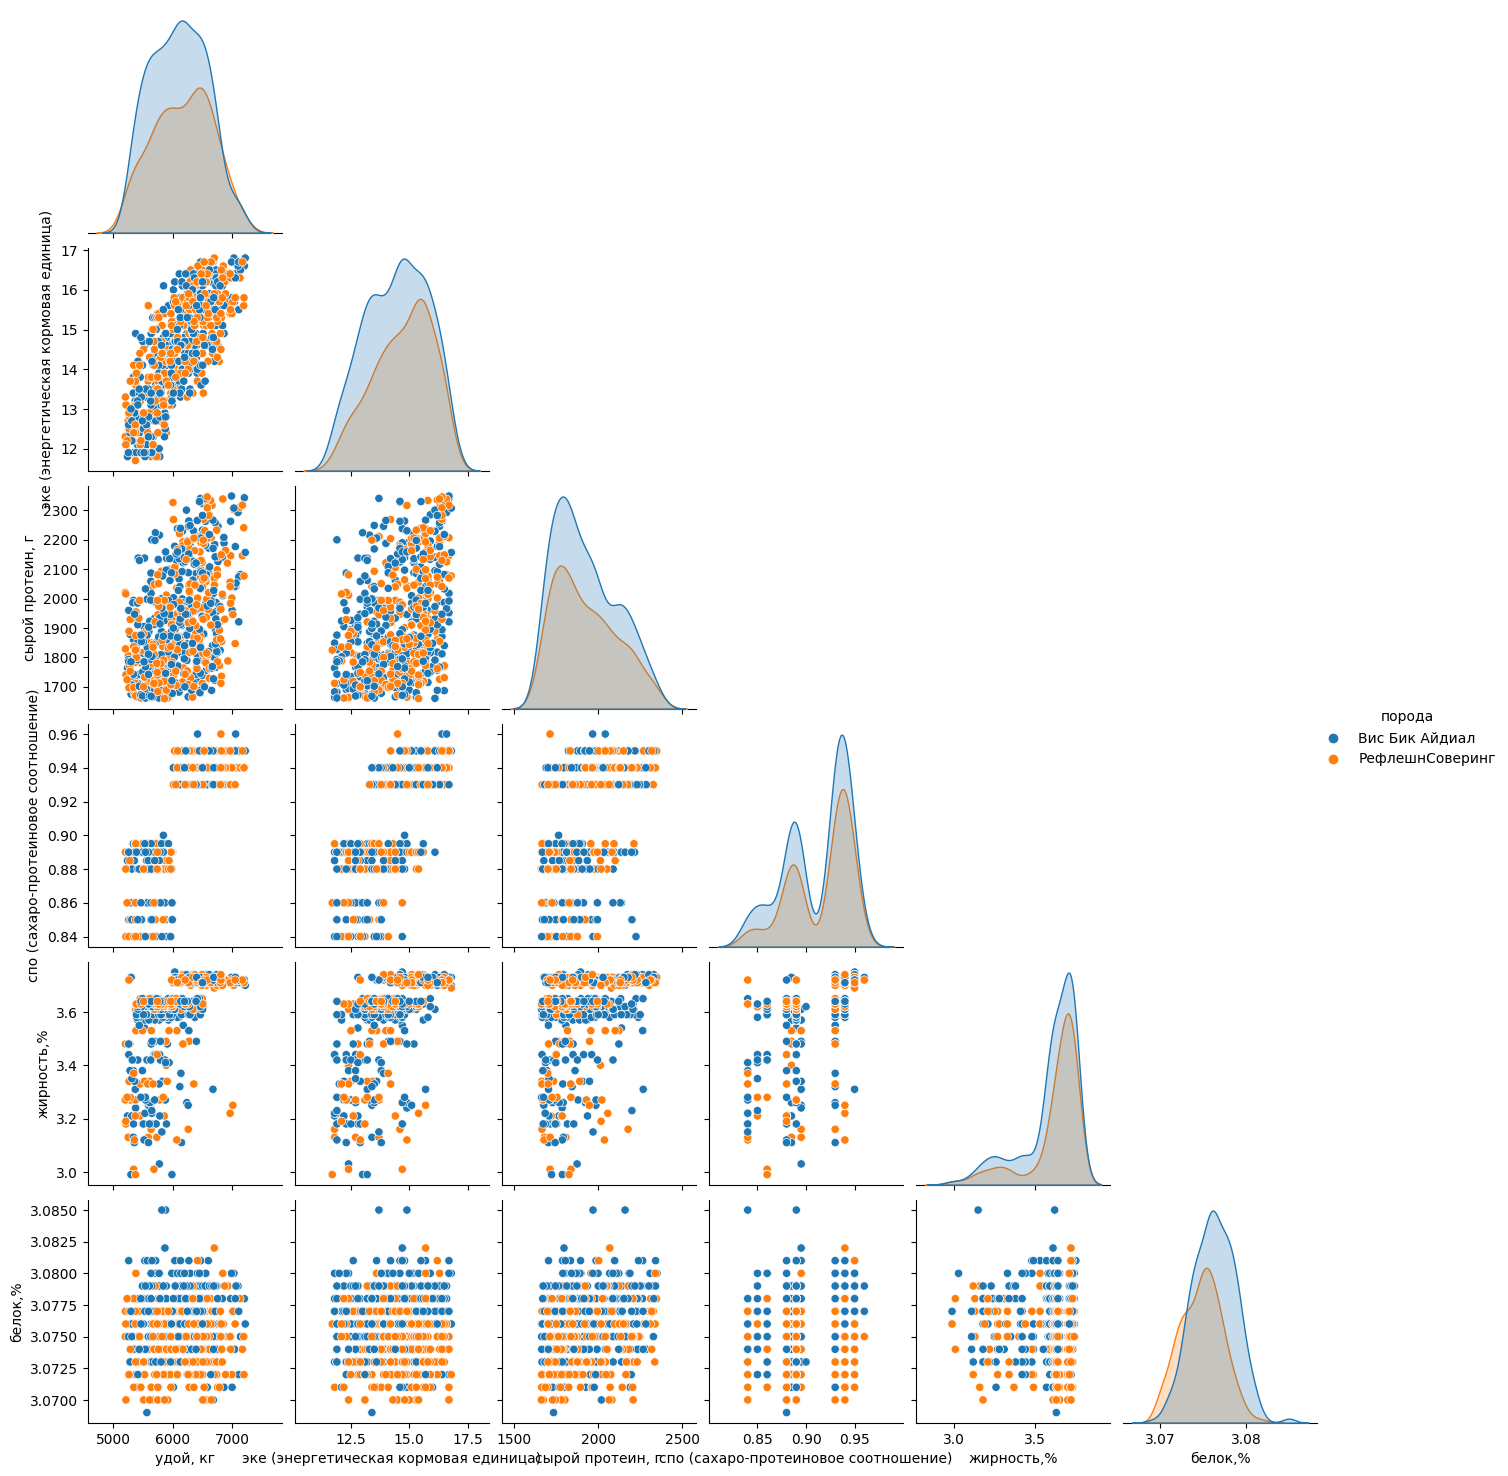

In [75]:
cols_numeric = ['удой, кг', "порода", 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']
data_ferma = ferma[cols_numeric]
g = sns.pairplot(data_ferma, corner=True, hue="порода")
g.fig.set_size_inches(15, 15)

In [76]:
data_ferma.corr()

,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%"
"удой, кг",1.000000,0.764265,0.448679,0.806094,0.598116,0.003570
эке (энергетическая кормовая единица),0.764265,1.000000,0.393388,0.747095,0.634394,-0.005943
"сырой протеин, г",0.448679,0.393388,1.000000,0.449206,0.359403,0.226845
спо (сахаро-протеиновое соотношение),0.806094,0.747095,0.449206,1.000000,0.627050,0.077893
"жирность,%",0.598116,0.634394,0.359403,0.627050,1.000000,-0.025720
"белок,%",0.003570,-0.005943,0.226845,0.077893,-0.025720,1.000000


Используем матрицу phik.

In [77]:
data_phik = data_ferma.phik_matrix()
data_phik

interval columns not set, guessing: ['удой, кг', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']


,"удой, кг",порода,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%"
"удой, кг",1.000000,0.155123,0.719586,0.467998,0.662489,0.706970,0.155791
порода,0.155123,1.000000,0.071752,0.093996,0.050903,0.224791,0.368454
эке (энергетическая кормовая единица),0.719586,0.071752,1.000000,0.449703,0.585912,0.710132,0.000000
"сырой протеин, г",0.467998,0.093996,0.449703,1.000000,0.387653,0.401062,0.210817
спо (сахаро-протеиновое соотношение),0.662489,0.050903,0.585912,0.387653,1.000000,0.648361,0.000000
"жирность,%",0.706970,0.224791,0.710132,0.401062,0.648361,1.000000,0.037475
"белок,%",0.155791,0.368454,0.000000,0.210817,0.000000,0.037475,1.000000


    Как мы видим наш целевой показатель "Удой" имеет линейную зависимость с данным спо (сахаро-протеиновое соотношение) и эке (энергетическая кормовая единица). Что вполне логично объясняется тем, что удой очень сильно зависит, от того чем вы кормите корову. График соотношения спо (сахаро-протеиновое соотношение) и удоя получился немного странный. Думаю надо разложить данный график на 2 составляющих это порода коровы и тип пастбища.

**Порода коровы**

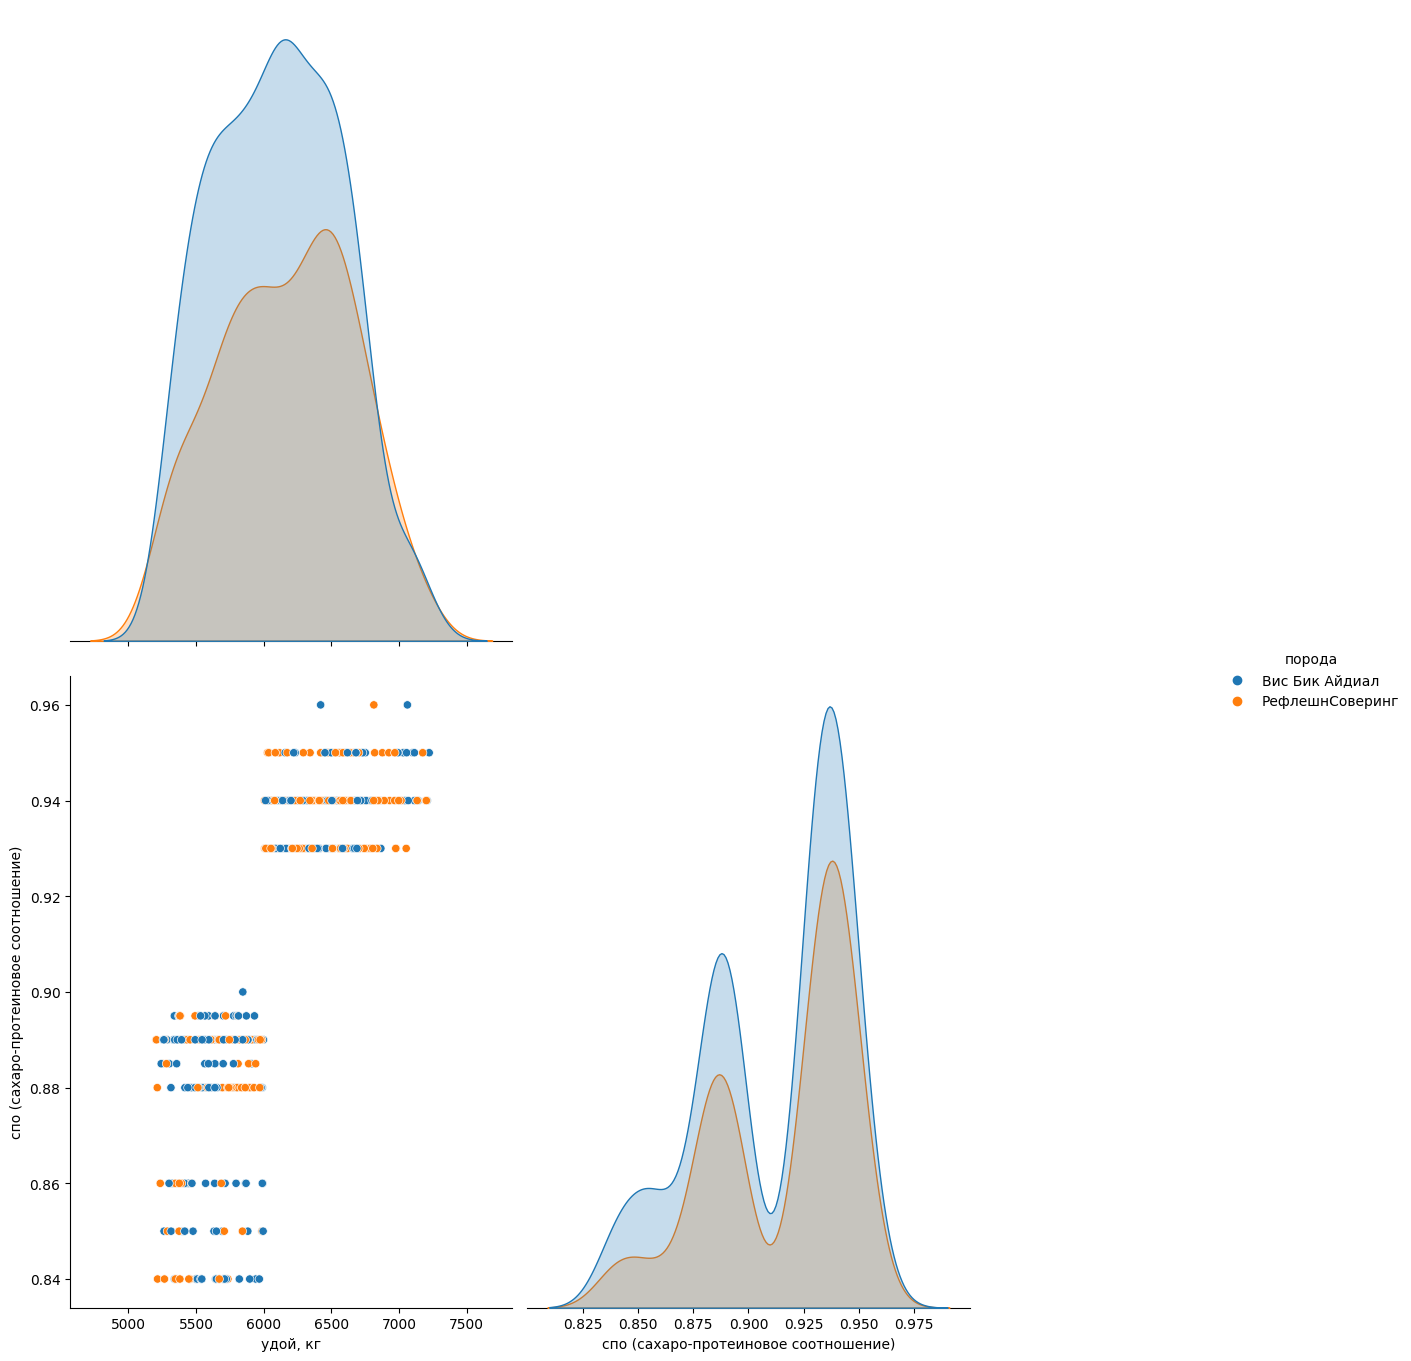

In [78]:
cols_numeric_breed = ['удой, кг', 'спо (сахаро-протеиновое соотношение)', "порода"]
data_ferma_breed = ferma[cols_numeric_breed]
g = sns.pairplot(data_ferma_breed, corner=True, hue="порода")
g.fig.set_size_inches(15, 15)

**Тип пастбища**

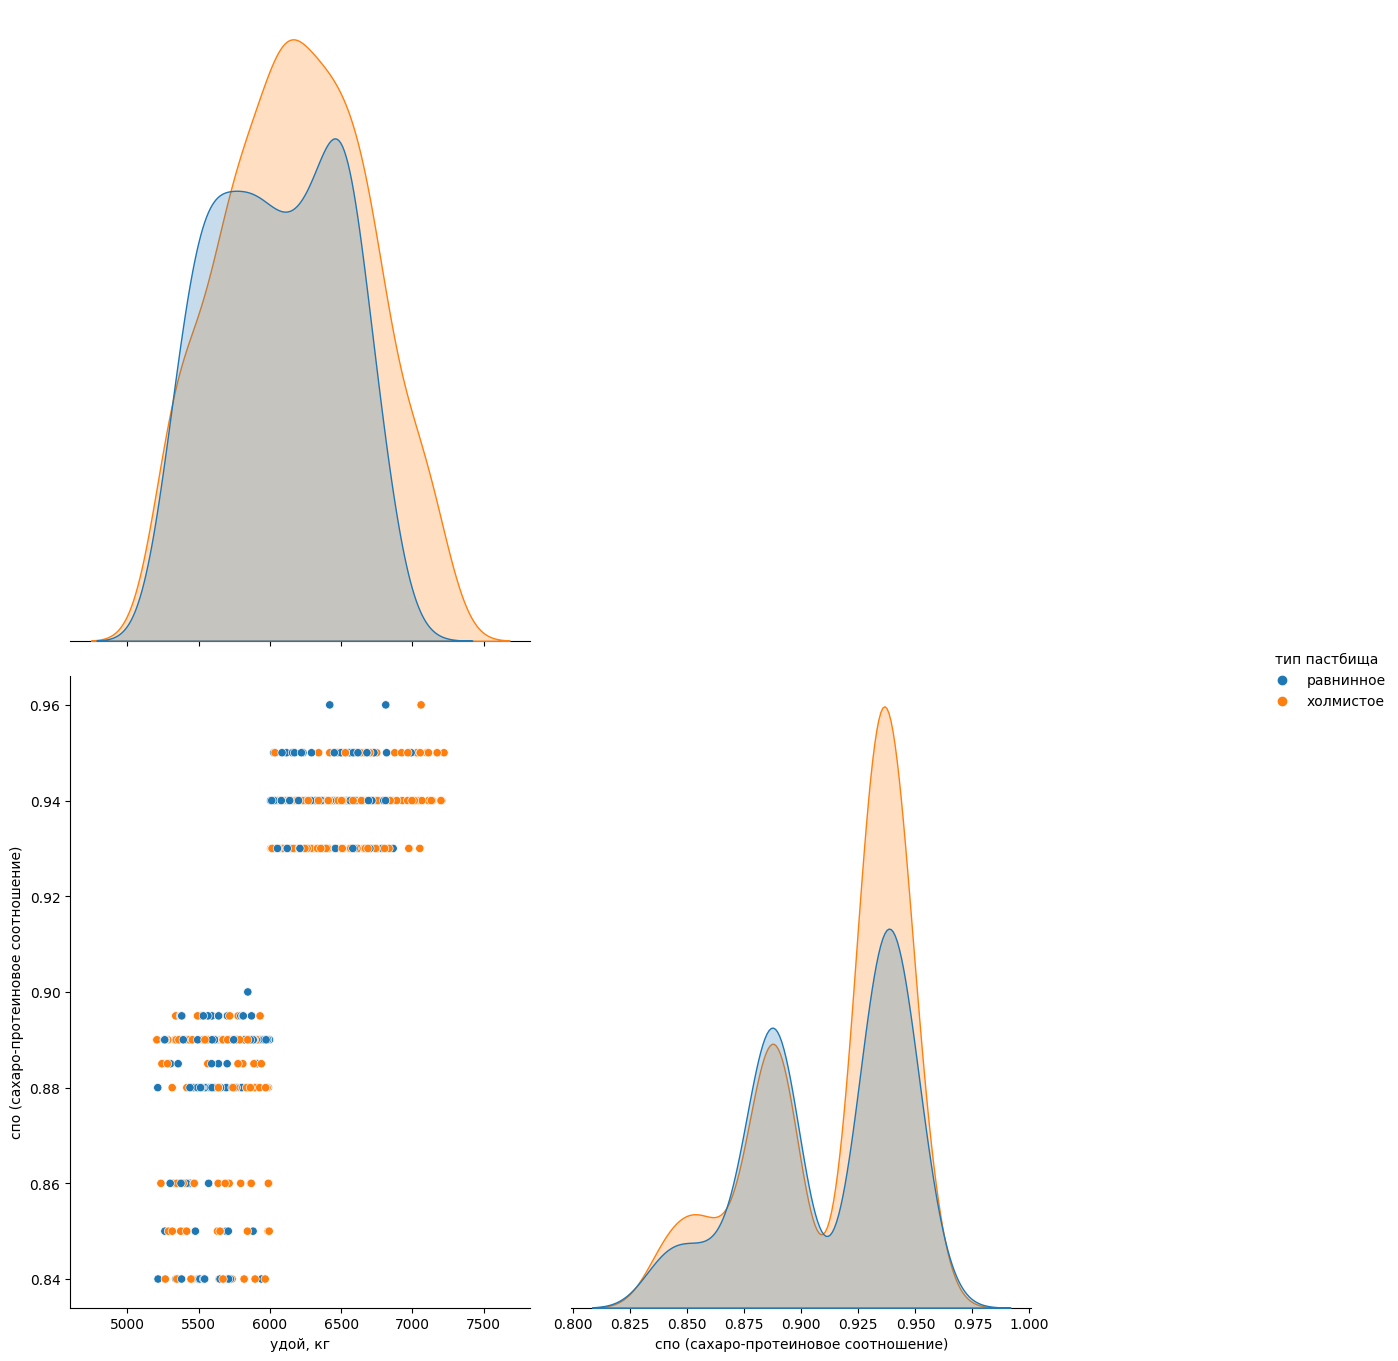

In [79]:
cols_numeric_pasture = ['удой, кг', 'спо (сахаро-протеиновое соотношение)', "тип пастбища"]
data_ferma_pasture = ferma[cols_numeric_pasture]
g = sns.pairplot(data_ferma_pasture, corner=True, hue="тип пастбища")
g.fig.set_size_inches(15, 15)

Как видно из графиков удой делится на 2 вида по сахарно-протеиновому соотношению, на тех коров которые дают до 6000 кг. молока в год и тех кто больше 6000 кг. При этом порода Вис Бик Айдиал дает большее значения соотношения, чем РефрешенСоверинг. А тип пастбища у коров дающих менее 6000 кг. молока  не влияет на этот показатель, в то же время как у коров дающих более 6000 кг. молока холмистое питание даст выше показатель сахарно-протеиновому соотношения.

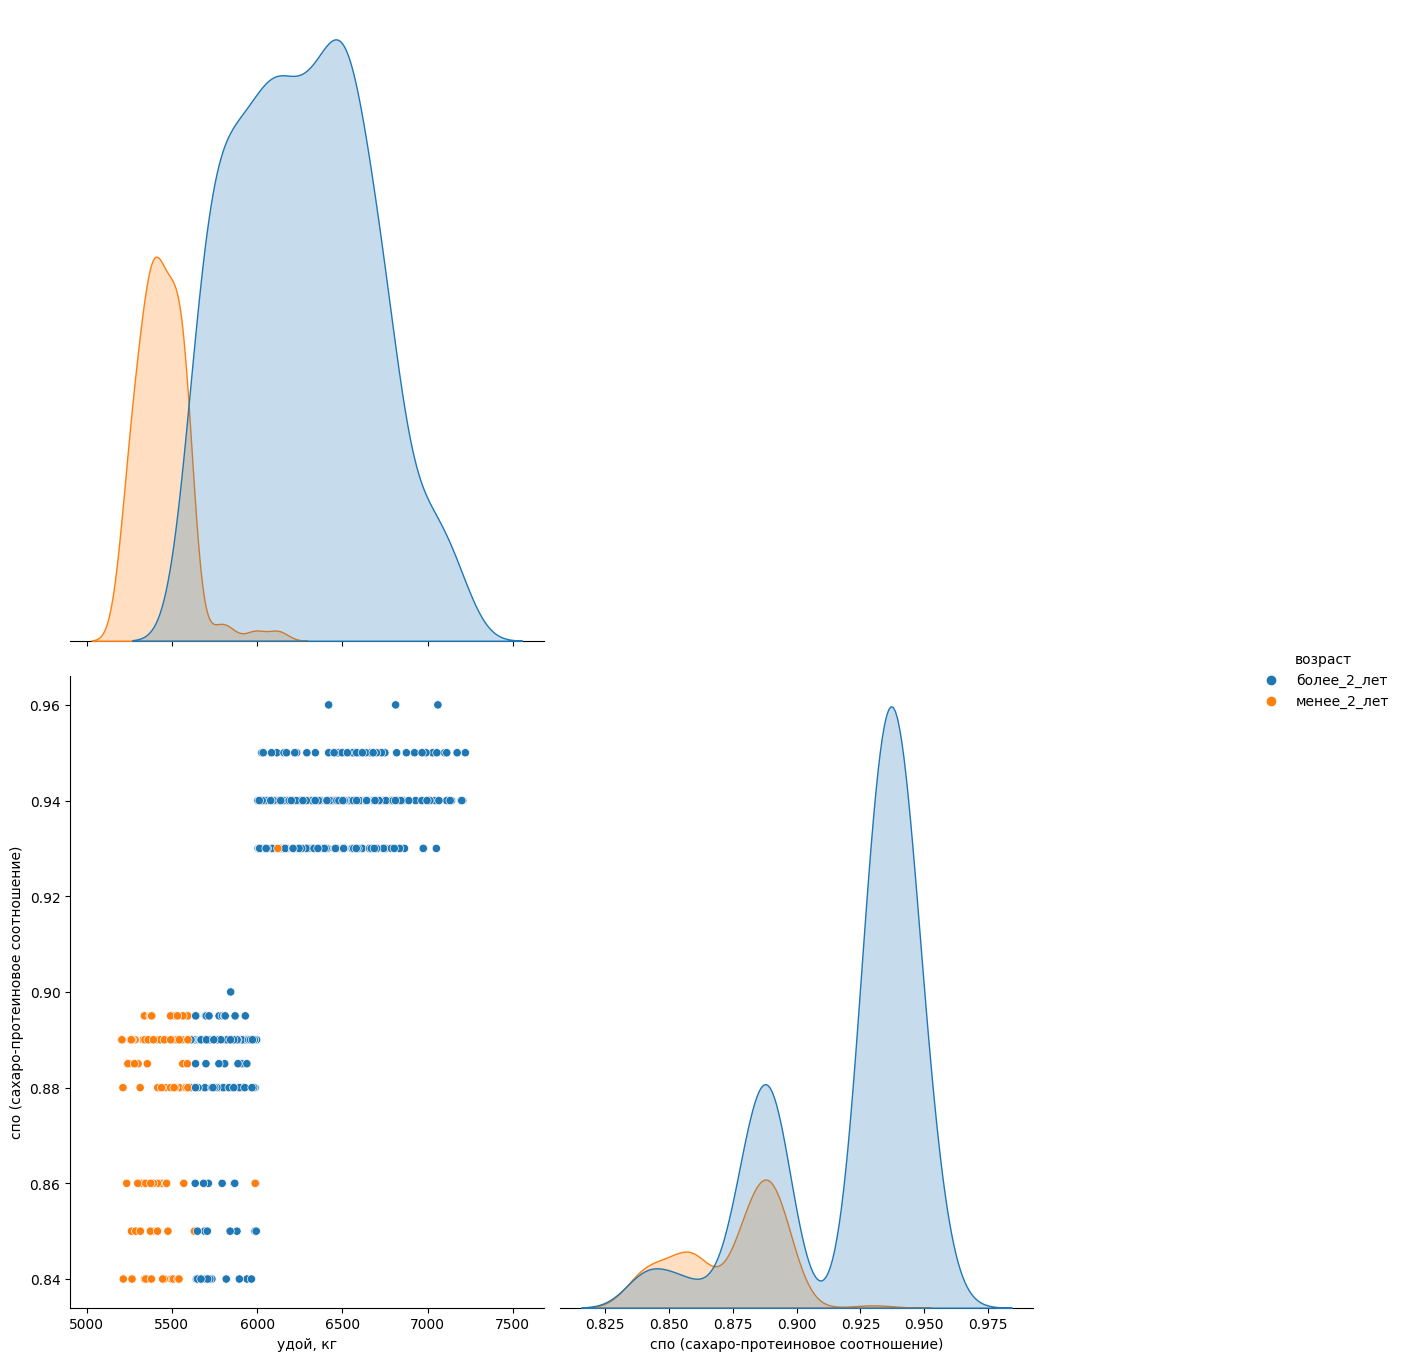

In [80]:
cols_numeric_pasture = ['удой, кг', 'спо (сахаро-протеиновое соотношение)', "возраст"]
data_ferma_pasture = ferma[cols_numeric_pasture]
g = sns.pairplot(data_ferma_pasture, corner=True, hue="возраст")
g.fig.set_size_inches(15, 15)

Да возраст коровы имеет значение, но все же думаю дело в физиологии. Коровы редко телятся до 2-х лет, поэтому удои и спо показаны так. 

## Обучение модели линейной регрессии

**Модель линейной регрессии № 1.**

Первое, что нам необходимо, это создать модель линейной регрессии для данных предоставленных заказчиком. Для этого воспользуемся данными датафрейма ferma. Нам необходимо закодировать категориальные признаки, и провести масштабирование данных. Наш целевой показатель удой каждой коровы.

В исследованиях линейной регрессии не будет учитываться показатель "вкус молока", т.к. он никак не влияет на удой. Также мы удалим ID коровы, он тоже не влияет на удой.

In [81]:
ferma.columns

Index(['id', 'порода', 'тип пастбища', 'возраст', 'порода папы_быка',
       'эке (энергетическая кормовая единица)', 'сырой протеин, г',
       'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%',
       'удой, кг', 'вкус молока'],
      dtype='object')

In [82]:
df = ferma.copy()

In [83]:
df = df.drop(['id'], axis=1)
df = df.drop(['вкус молока'], axis=1)
df.head()

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529
2,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895
4,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302


R2 LinearRegression = 0.79
RSME = 210
MSE = 44170
MAE = 167
Прогнозируемое значение (первая строка) =  6569.4792276035705 Реальное значение (первая строка) =  6574


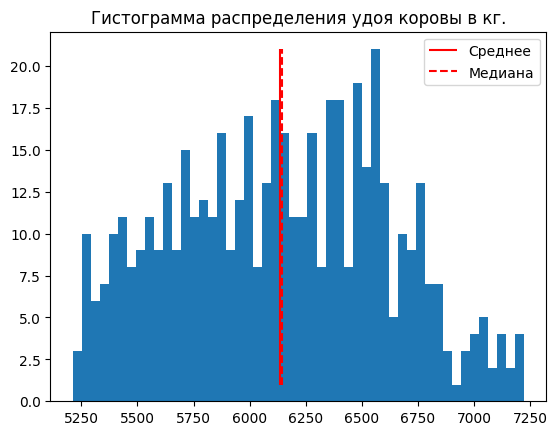

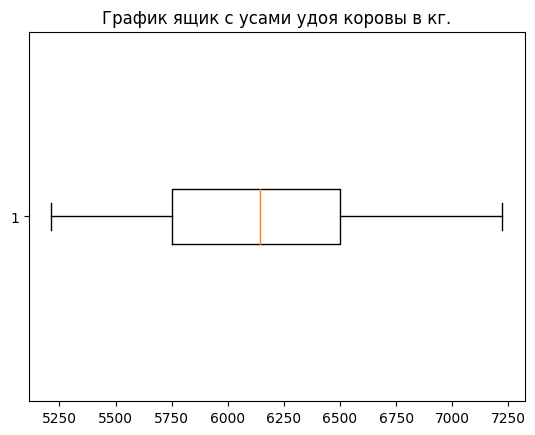

In [84]:
RANDOM_STATE = 42

X = df.drop(['удой, кг'], axis=1)
y = df['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=RANDOM_STATE
)

cat_col_names = ['порода', 'тип пастбища',  'порода папы_быка',  'возраст']
num_col_names = ['эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%']

#One-Hot Encoding
encoder_ferma = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_ferma.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder_ferma.transform(X_test[cat_col_names])

encoder_col_names = encoder_ferma.get_feature_names()
#StandardScaler
scaler_ferma = StandardScaler()
X_train_scaled = scaler_ferma.fit_transform(X_train[num_col_names])
X_test_scaled = scaler_ferma.transform(X_test[num_col_names])
#Соединим данные в единый датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#Изучаем модель линейной регресси
model_lr1  = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions = model_lr1.predict(X_test)

# посчитаем ошибки
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
rmse = mean_squared_error(predictions, y_test, squared=False) 
r2 = r2_score(y_test ,predictions)

# выведем ошибки
print(f"R2 LinearRegression = {r2:.2f}")
print(f"RSME = {rmse:.0f}")
print(f'MSE = {mse:.0f}')
print(f'MAE = {mae:.0f}')
#Сравним первые строки прогноза с реальным значением
print('Прогнозируемое значение (первая строка) = ', predictions[0], 'Реальное значение (первая строка) = ', y_test.reset_index(drop = True)[0])

## визуализация распределения целевого признака
# построем частотную гистограмму распределения целевого признака с bins=50
bins =  plt.hist(y_train, bins = 50)
plt.vlines(x=y_train.mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=y_train.median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения удоя коровы в кг.')
plt.legend()
plt.show()

# построем ящик с усами целевого признака с горизонтальной ориентацией
plt.title('График ящик с усами удоя коровы в кг.')
plt.boxplot(y_train, vert=False)
plt.show()

Коэффициент детерминации R² по данным заказчика у нас составил 0,79.

Средняя абсолютная ошибка MAE составила 167 кг.

Сумма квадратов ошибок MSE равна 44170.

Корень из суммы квадратов ошибок RSME равен 210 кг.

In [85]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

95% доверительный интервал = (6049.843570819946, 6186.77596707883)


**Модель линейной регрессии № 2.**

Мы обнаружили, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.
Также видно, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

Создадим новый датафрейм.

In [86]:
ferma_new = df.copy()
ferma_new.head()

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529
2,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895
4,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302


Возведем показатель эке (энергетическая кормовая единица) в квадрат.

In [87]:
ferma_new['эке (энергетическая кормовая единица)'] = ferma_new['эке (энергетическая кормовая единица)'] ** 2
ferma_new.head()

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,201.639999,1743,0.890,3.58,3.076,5863
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,163.840012,2138,0.890,3.54,3.079,5529
2,РефлешнСоверинг,холмистое,более_2_лет,Соверин,196.000000,1854,0.885,3.59,3.074,5810
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,153.759995,2012,0.885,3.40,3.075,5895
4,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,163.840012,1675,0.885,3.73,3.073,5302


In [88]:
ferma_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 628
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   порода                                 626 non-null    object 
 1   тип пастбища                           626 non-null    object 
 2   возраст                                626 non-null    object 
 3   порода папы_быка                       626 non-null    object 
 4   эке (энергетическая кормовая единица)  626 non-null    float32
 5   сырой протеин, г                       626 non-null    int64  
 6   спо (сахаро-протеиновое соотношение)   626 non-null    float32
 7   жирность,%                             626 non-null    float32
 8   белок,%                                626 non-null    float32
 9   удой, кг                               626 non-null    int64  
dtypes: float32(4), int64(2), object(4)
memory usage: 44.0+ KB


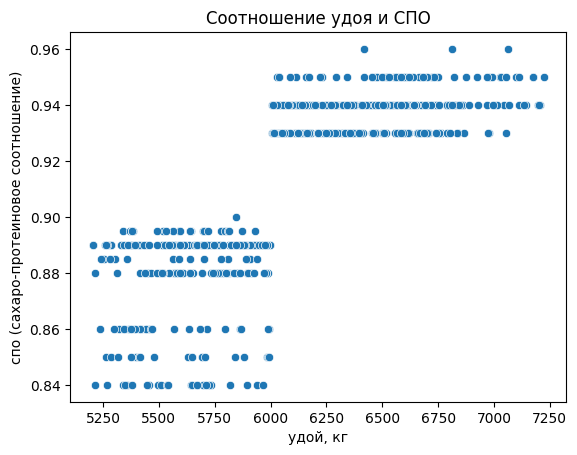

In [89]:
sns.scatterplot(x="удой, кг", y="спо (сахаро-протеиновое соотношение)", data=ferma)
plt.title("Соотношение удоя и СПО")
plt.show()

Хорошо видно разделение СПО на 2 категории. Проведем распределение на 2 группы до 0,92 и после.

In [90]:
ferma_new['спо (сахаро-протеиновое соотношение)'] = ferma_new['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x >= 0.92 else 0)

In [91]:
ferma_new.tail()

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг"
624,РефлешнСоверинг,равнинное,более_2_лет,Айдиал,237.159988,1964,1,3.74,3.075,6812
625,РефлешнСоверинг,равнинное,менее_2_лет,Соверин,166.409988,1700,0,3.64,3.073,5513
626,РефлешнСоверинг,холмистое,более_2_лет,Соверин,207.359985,1837,0,3.64,3.075,5970
627,РефлешнСоверинг,равнинное,более_2_лет,Соверин,190.440002,1994,0,3.64,3.077,5746
628,Вис Бик Айдиал,холмистое,более_2_лет,Соверин,262.440033,2283,1,3.71,3.076,6503


Построим модель по новым данным.

R2 LinearRegression = 0.82
RSME = 194
MSE = 37665
MAE = 148
Прогнозируемое значение (первая строка) =  6583.026286813382 Реальное значение (первая строка) =  6574


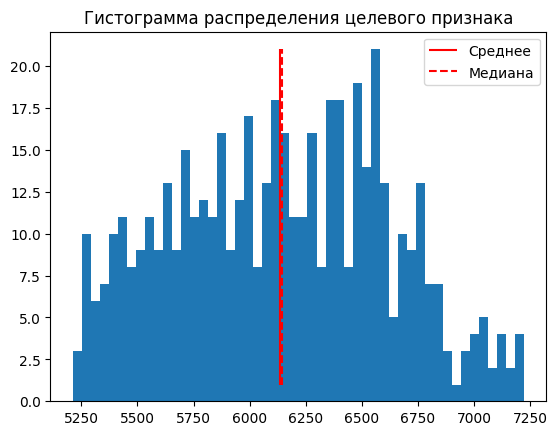

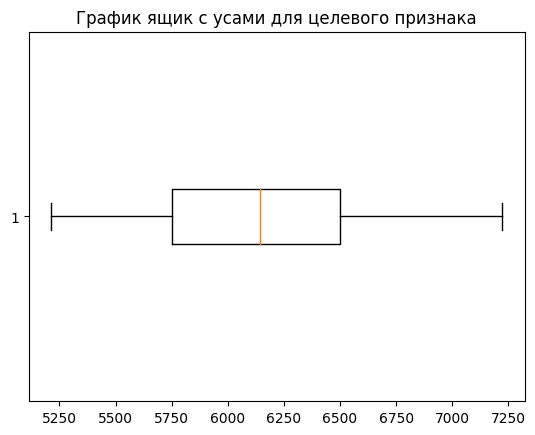

In [92]:
RANDOM_STATE = 42

X = ferma_new.drop('удой, кг', axis=1)
y = ferma_new['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=RANDOM_STATE
)
#выбираем столбцы для категоризации данных
cat_col_names_new = ['порода', 'тип пастбища', 'спо (сахаро-протеиновое соотношение)',  'порода папы_быка', 'возраст']
num_col_names_new = ['сырой протеин, г', 'эке (энергетическая кормовая единица)']

#One-Hot Encoding
encoder_new = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_new.fit_transform(X_train[cat_col_names_new])
X_test_ohe = encoder_new.transform(X_test[cat_col_names_new])

encoder_col_names_new = encoder_new.get_feature_names()

#StandardScaler
scaler_new = StandardScaler()
X_train_scaled = scaler_new.fit_transform(X_train[num_col_names_new])
X_test_scaled = scaler_new.transform(X_test[num_col_names_new])

#Создадим новый датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names_new)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names_new)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names_new)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names_new)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициализируем модель линейной регрессии
model_lr2  = LinearRegression()


# обучим модель на тренировочных данных
model_lr2.fit(X_train, y_train)

# получим предсказания модели на тестовых данных 

predictions2 = model_lr2.predict(X_test)

# посчитаем ошибки
mae = mean_absolute_error(predictions2, y_test)
mse = mean_squared_error(predictions2, y_test)
rmse = mean_squared_error(predictions2, y_test, squared=False) 
r2 = r2_score(y_test ,predictions2)

# выведим ошибки
print(f"R2 LinearRegression = {r2:.2f}")
print(f"RSME = {rmse:.0f}")
print(f'MSE = {mse:.0f}')
print(f'MAE = {mae:.0f}')
# выведем первые строки спрогнозированного значения и фактического
print('Прогнозируемое значение (первая строка) = ', predictions2[0], 'Реальное значение (первая строка) = ', y_test.reset_index(drop = True)[0])

# построим частотную гистограмму распределения целевого признака с bins=50
bins =  plt.hist(y_train, bins = 50)
plt.vlines(x=y_train.mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=y_train.median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения целевого признака')
plt.legend()
plt.show()

# построим ящик с усами целевого признака с горизонтальной ориентацией
plt.title('График ящик с усами для целевого признака')
plt.boxplot(y_train, vert=False)
plt.show()

Коэффициент детерминации R² по измененным данным составил 0,82.

Средняя абсолютная ошибка MAE составила 148 кг., что вышее чем в первичном прогнозе.

Сумма квадратов ошибок MSE равна 37665, это ниже чем в первом прогнозе.

Корень из суммы квадратов ошибок RSME равен 194 кг, что также ниже чем в первом прогнозе.

Исходя из полученных данных пока 2 модель лучшая. Сравним ее с 3 моделью.

In [93]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions2), scale=st.sem(predictions2)))

95% доверительный интервал = (6042.87434788783, 6186.618621486621)


**Модель линейной регрессии № 3.**

Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

In [94]:
data = ferma.merge(dad, on ='id', how='inner')

In [95]:
data.head()

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока,имя_папы
0,1,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863,вкусно,Буйный
1,2,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529,вкусно,Соловчик
2,3,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810,не вкусно,Барин
3,4,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895,не вкусно,Буйный
4,5,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302,вкусно,Барин


In [96]:
data.columns

Index(['id', 'порода', 'тип пастбища', 'возраст', 'порода папы_быка',
       'эке (энергетическая кормовая единица)', 'сырой протеин, г',
       'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%',
       'удой, кг', 'вкус молока', 'имя_папы'],
      dtype='object')

Удалим столбца ID и вкус молока

In [97]:
data = data.drop(['id'], axis=1)
data = data.drop(['вкус молока'], axis=1)
data = data.drop(['жирность,%'], axis=1)
data = data.drop(['белок,%'], axis=1)

Приведем столбцы к единому формату.

In [98]:
data.columns

Index(['порода', 'тип пастбища', 'возраст', 'порода папы_быка',
       'эке (энергетическая кормовая единица)', 'сырой протеин, г',
       'спо (сахаро-протеиновое соотношение)', 'удой, кг', 'имя_папы'],
      dtype='object')

In [99]:
data = data[['порода', 'тип пастбища', 'возраст', 'порода папы_быка',
       'эке (энергетическая кормовая единица)', 'сырой протеин, г',
       'спо (сахаро-протеиновое соотношение)', 'имя_папы',
       'удой, кг']]

Устраним нелинейность между признаками., для этого возведем показатель эке (энергетическая кормовая единица) в квадрат.

In [100]:
data['эке (энергетическая кормовая единица)'] = data['эке (энергетическая кормовая единица)'] ** 2

Добавим категоризацию по СПО.

In [101]:
data['спо (сахаро-протеиновое соотношение)'] = data['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x >= 0.92 else 0)

Построим третью модель.

R2 LinearRegression = 0.83
RSME = 190
MSE = 36055
MAE = 145
Прогнозируемое значение (первая строка) =  6607.812933665375 Реальное значение (первая строка) =  6574


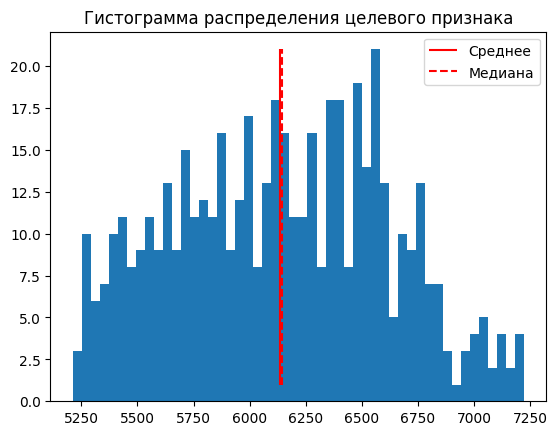

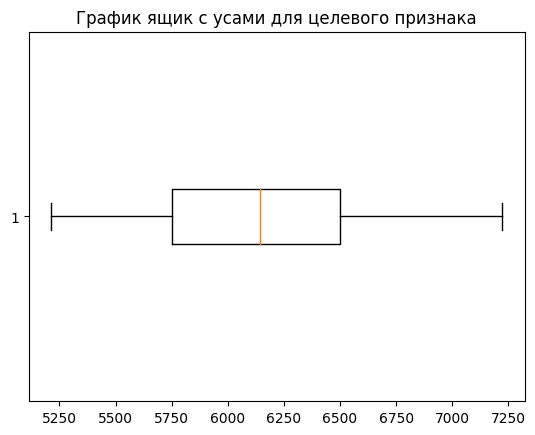

In [102]:
RANDOM_STATE = 42

X = data.drop('удой, кг', axis=1)
y = data['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=RANDOM_STATE
)
#зададим столбцы для категоризации данных
cat_col_names_dad = ['порода', 'тип пастбища', 'спо (сахаро-протеиновое соотношение)', 'порода папы_быка', 'возраст', 'имя_папы']
num_col_names_dad = ['эке (энергетическая кормовая единица)', 'сырой протеин, г']

# One-Hot Encoding
encoder_dad = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_dad.fit_transform(X_train[cat_col_names_dad])
X_test_ohe = encoder_dad.transform(X_test[cat_col_names_dad])

encoder_col_names_dad = encoder_dad.get_feature_names()

# StandardScaler
scaler_dad = StandardScaler()
X_train_scaled = scaler_dad.fit_transform(X_train[num_col_names_dad])
X_test_scaled = scaler_dad.transform(X_test[num_col_names_dad])

# Новый датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names_dad)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names_dad)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names_dad)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names_dad)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#Модель 3
model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions3 = model_lr3.predict(X_test)
# посчитаем ошибки
mae = mean_absolute_error(predictions3, y_test)
mse = mean_squared_error(predictions3, y_test)
rmse = mean_squared_error(predictions3, y_test, squared=False) 
r2 = r2_score(y_test ,predictions3)

# выведем ошибки
print(f"R2 LinearRegression = {r2:.2f}")
print(f"RSME = {rmse:.0f}")
print(f'MSE = {mse:.0f}')
print(f'MAE = {mae:.0f}')
#выведем первые строки предсказаного значения удоя и фактического
print('Прогнозируемое значение (первая строка) = ', predictions3[0], 'Реальное значение (первая строка) = ', y_test.reset_index(drop = True)[0])

# построем частотную гистограмму распределения целевого признака с bins=50
bins =  plt.hist(y_train, bins = 50)
plt.vlines(x=y_train.mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=y_train.median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения целевого признака')
plt.legend()
plt.show()

# построем ящик с усами целевого признака с горизонтальной ориентацией
plt.title('График ящик с усами для целевого признака')
plt.boxplot(y_train, vert=False)
plt.show()


Коэффициент детерминации R² по измененным данным составил 0,83.

Средняя абсолютная ошибка MAE составила 145 кг., что ниже чем во втором прогнозе.

Сумма квадратов ошибок MSE равна 36055, это ниже чем во втором прогнозе.

Корень из суммы квадратов ошибок RSME равен 190 кг, что также ниже чем во втором прогнозе.

Получается, что лучшая модель 3-я. По ней и будет проводится прогноз удоя молока.

Определим доверительный интервал прогноза лучшей модели.

In [103]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал = (6039.68388262231, 6185.765223967488)


**Прогноз удоя коров, которых фермер хочет купить.**

Для проведения прогноза удоя нам необходимо создать новый датафрейм и добавить недостающие столбцы.

In [104]:
cow_buy_new = cow_buy.copy()

In [105]:
cow_buy_new.columns

Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы', 'жирность,%',
       'белок,%', 'возраст'],
      dtype='object')

In [106]:
cow_buy_new

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Добавим столбец 'эке (энергетическая кормовая единица)', значения выберем из датафрейма ферма по типу пастбища, значения возьмем средние.

In [107]:
# код ревьюера
# смотрю на данные
display(data.head(2))
display(cow_buy.head(2))
# сделаю копию, чтобы не задействовать твои расчеты
cow_buy_example = cow_buy.copy()
# делаем расчет среднего, создаем и заполняем им новую колонку. Можно здесь же вычислять сразу квадрат или делать категоризацию.
cow_buy_example['эке'] = data['эке (энергетическая кормовая единица)'].mean()*1.05
display(cow_buy_example.head(2))

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),имя_папы,"удой, кг"
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,201.639999,1743,0,Буйный,5863
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,163.840012,2138,0,Соловчик,5529


,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.335025
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.335025


In [108]:
eke_mean = pd.pivot_table(ferma, index='тип пастбища', values='эке (энергетическая кормовая единица)', aggfunc={'эке (энергетическая кормовая единица)': ['mean']})
display(eke_mean.sort_values('mean',ascending=False))

,mean
тип пастбища,
холмистое,14.673066
равнинное,14.417689


In [109]:
eke_mean.rename(columns={'mean' : 'эке (энергетическая кормовая единица)'}, inplace=True)

In [110]:
cow_buy_new = cow_buy_new.merge(eke_mean, on ='тип пастбища', how='left')
cow_buy_new

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица)
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,14.417689
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,14.673066
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,14.417689
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,14.417689
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,14.417689
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.673066


Аналогично столбец 'спо (сахаро-протеиновое соотношение)'.

In [111]:
spo_mean = pd.pivot_table(ferma, index='тип пастбища', values='спо (сахаро-протеиновое соотношение)', aggfunc={'спо (сахаро-протеиновое соотношение)': ['mean']})
display(spo_mean.sort_values('mean',ascending=False))

,mean
тип пастбища,
холмистое,0.915043
равнинное,0.911011


In [112]:
spo_mean.rename(columns={'mean' : 'спо (сахаро-протеиновое соотношение)'}, inplace=True)

In [113]:
cow_buy_new = cow_buy_new.merge(spo_mean, on ='тип пастбища', how='left')
cow_buy_new

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица),спо (сахаро-протеиновое соотношение)
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,14.417689,0.911011
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689,0.911011
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,14.673066,0.915043
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,14.417689,0.911011
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,14.417689,0.911011
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,14.417689,0.911011
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689,0.911011
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.673066,0.915043


Ну и сырой протеин.

In [114]:
protein_mean = pd.pivot_table(ferma, index='тип пастбища', values='сырой протеин, г', aggfunc={'сырой протеин, г': ['mean']})
display(protein_mean.sort_values('mean',ascending=False))

,mean
тип пастбища,
холмистое,1935.091691
равнинное,1909.364621


In [115]:
protein_mean.rename(columns={'mean' : 'сырой протеин, г'}, inplace=True)

In [116]:
cow_buy_new = cow_buy_new.merge(protein_mean, on ='тип пастбища', how='left')
cow_buy_new

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица),спо (сахаро-протеиновое соотношение),"сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,14.417689,0.911011,1909.364621
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,14.673066,0.915043,1935.091691
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,14.417689,0.911011,1909.364621
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,14.417689,0.911011,1909.364621
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,14.417689,0.911011,1909.364621
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.673066,0.915043,1935.091691


Мы видим, что быки Буйный и Геркулес по данным от поставщика относятся к 2-м породам. Думаю здесь ошибка в заполнении данных. Поэтому этот столбец удалим и подтянем данные из датафрейма фермы.

In [117]:
cow_buy_new = cow_buy_new.drop(['порода папы_быка'], axis=1)
cow_buy_new

,порода,тип пастбища,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица),спо (сахаро-протеиновое соотношение),"сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691
1,Вис Бик Айдиал,равнинное,Буйный,3.54,3.081,менее_2_лет,14.417689,0.911011,1909.364621
2,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.061,более_2_лет,14.673066,0.915043,1935.091691
4,РефлешнСоверинг,равнинное,Буйный,3.64,3.074,более_2_лет,14.417689,0.911011,1909.364621
5,РефлешнСоверинг,равнинное,Геркулес,3.63,3.053,менее_2_лет,14.417689,0.911011,1909.364621
6,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691
7,Вис Бик Айдиал,равнинное,Буйный,3.57,3.079,более_2_лет,14.417689,0.911011,1909.364621
8,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621
9,РефлешнСоверинг,холмистое,Буйный,3.40,3.079,менее_2_лет,14.673066,0.915043,1935.091691


In [118]:
df = data.loc[0:7, ['имя_папы', 'порода папы_быка']]
df = df.drop(index=[ 3 , 4 , 5, 6])
df

,имя_папы,порода папы_быка
0,Буйный,Айдиал
1,Соловчик,Соверин
2,Барин,Соверин
7,Геркулес,Айдиал


In [119]:
cow_buy_new = cow_buy_new.merge(df, on ='имя_папы', how='left')
cow_buy_new

,порода,тип пастбища,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица),спо (сахаро-протеиновое соотношение),"сырой протеин, г",порода папы_быка
0,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691,Айдиал
1,Вис Бик Айдиал,равнинное,Буйный,3.54,3.081,менее_2_лет,14.417689,0.911011,1909.364621,Айдиал
2,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621,Соверин
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.061,более_2_лет,14.673066,0.915043,1935.091691,Айдиал
4,РефлешнСоверинг,равнинное,Буйный,3.64,3.074,более_2_лет,14.417689,0.911011,1909.364621,Айдиал
5,РефлешнСоверинг,равнинное,Геркулес,3.63,3.053,менее_2_лет,14.417689,0.911011,1909.364621,Айдиал
6,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,14.673066,0.915043,1935.091691,Айдиал
7,Вис Бик Айдиал,равнинное,Буйный,3.57,3.079,более_2_лет,14.417689,0.911011,1909.364621,Айдиал
8,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,14.417689,0.911011,1909.364621,Соверин
9,РефлешнСоверинг,холмистое,Буйный,3.40,3.079,менее_2_лет,14.673066,0.915043,1935.091691,Айдиал


По тех задания нам нужно увеличить столбцы 'эке (энергетическая кормовая единица)', 'спо (сахаро-протеиновое соотношение)', 'сырой протеин, г' увеличить на 5 %.

In [120]:
cow_buy_new['эке (энергетическая кормовая единица)'] = cow_buy_new['эке (энергетическая кормовая единица)'] * 1.05
cow_buy_new['спо (сахаро-протеиновое соотношение)'] = cow_buy_new['спо (сахаро-протеиновое соотношение)'] * 1.05
cow_buy_new['сырой протеин, г'] = cow_buy_new['сырой протеин, г'] * 1.05

Избавимся от нелинейной зависимости в столбце 'эке (энергетическая кормовая единица)'.

In [121]:
cow_buy_new['эке (энергетическая кормовая единица)'] = cow_buy_new['эке (энергетическая кормовая единица)'] ** 2
cow_buy_new

,порода,тип пастбища,имя_папы,"жирность,%","белок,%",возраст,эке (энергетическая кормовая единица),спо (сахаро-протеиновое соотношение),"сырой протеин, г",порода папы_быка
0,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,237.366989,0.960795,2031.846275,Айдиал
1,Вис Бик Айдиал,равнинное,Буйный,3.54,3.081,менее_2_лет,229.176376,0.956561,2004.832852,Айдиал
2,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,229.176376,0.956561,2004.832852,Соверин
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.061,более_2_лет,237.366989,0.960795,2031.846275,Айдиал
4,РефлешнСоверинг,равнинное,Буйный,3.64,3.074,более_2_лет,229.176376,0.956561,2004.832852,Айдиал
5,РефлешнСоверинг,равнинное,Геркулес,3.63,3.053,менее_2_лет,229.176376,0.956561,2004.832852,Айдиал
6,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,237.366989,0.960795,2031.846275,Айдиал
7,Вис Бик Айдиал,равнинное,Буйный,3.57,3.079,более_2_лет,229.176376,0.956561,2004.832852,Айдиал
8,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,229.176376,0.956561,2004.832852,Соверин
9,РефлешнСоверинг,холмистое,Буйный,3.40,3.079,менее_2_лет,237.366989,0.960795,2031.846275,Айдиал


Приведем столбцы к единому виду, заданному выше.

In [122]:
cow_buy_new.columns

Index(['порода', 'тип пастбища', 'имя_папы', 'жирность,%', 'белок,%',
       'возраст', 'эке (энергетическая кормовая единица)',
       'спо (сахаро-протеиновое соотношение)', 'сырой протеин, г',
       'порода папы_быка'],
      dtype='object')

In [123]:
cow_buy_new = cow_buy_new[['порода', 'тип пастбища', 'возраст', 'порода папы_быка', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)',
        'жирность,%', 'белок,%', 'имя_папы']]

Столбец СПО кодируется как категориальный признак.

In [124]:
cow_buy_new['спо (сахаро-протеиновое соотношение)'] = cow_buy_new['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x >= 0.92 else 0)

Столбец 'сырой протеин, г' приведем к формату int64.

In [125]:
cow_buy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   порода                                 20 non-null     object 
 1   тип пастбища                           20 non-null     object 
 2   возраст                                20 non-null     object 
 3   порода папы_быка                       20 non-null     object 
 4   эке (энергетическая кормовая единица)  20 non-null     float32
 5   сырой протеин, г                       20 non-null     float64
 6   спо (сахаро-протеиновое соотношение)   20 non-null     int64  
 7   жирность,%                             20 non-null     float32
 8   белок,%                                20 non-null     float32
 9   имя_папы                               20 non-null     object 
dtypes: float32(3), float64(1), int64(1), object(5)
memory usage: 1.5+ KB


In [126]:
cow_buy_new['сырой протеин, г'] = cow_buy_new['сырой протеин, г'].astype('int64')

In [127]:
cow_buy_new

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%",имя_папы
0,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.58,3.076,Геркулес
1,Вис Бик Айдиал,равнинное,менее_2_лет,Айдиал,229.176376,2004,1,3.54,3.081,Буйный
2,РефлешнСоверинг,равнинное,более_2_лет,Соверин,229.176376,2004,1,3.59,3.074,Барин
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.40,3.061,Буйный
4,РефлешнСоверинг,равнинное,более_2_лет,Айдиал,229.176376,2004,1,3.64,3.074,Буйный
5,РефлешнСоверинг,равнинное,менее_2_лет,Айдиал,229.176376,2004,1,3.63,3.053,Геркулес
6,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.58,3.076,Геркулес
7,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,229.176376,2004,1,3.57,3.079,Буйный
8,РефлешнСоверинг,равнинное,более_2_лет,Соверин,229.176376,2004,1,3.59,3.074,Барин
9,РефлешнСоверинг,холмистое,менее_2_лет,Айдиал,237.366989,2031,1,3.40,3.079,Буйный


In [128]:
data.head()

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),имя_папы,"удой, кг"
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,201.639999,1743,0,Буйный,5863
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,163.840012,2138,0,Соловчик,5529
2,РефлешнСоверинг,холмистое,более_2_лет,Соверин,196.000000,1854,0,Барин,5810
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,153.759995,2012,0,Буйный,5895
4,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,163.840012,1675,0,Барин,5302


Строим модель прогноза удоя.

In [129]:
df1 = encoder_dad.transform(cow_buy_new[cat_col_names_dad]) 
df2 = scaler_dad.transform(cow_buy_new[num_col_names_dad])

X_test_ohe = pd.DataFrame(df1, columns=encoder_col_names_dad)

X_test_scaled = pd.DataFrame(df2, columns=num_col_names_dad)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
cow_buy_result['удой, кг'] = model_lr3.predict(X_test)

In [130]:
cow_buy_result

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,"удой, кг"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6313.383799
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6618.206943
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6523.901286
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6354.958045
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6504.655148
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6426.935594


С учетом того, что коэфициент детерминации равен 0,83, то прогноз полученного удоя более чем отличный. Более того, практически все коровы по удою проходят в пороговое значение для покупки.

При проведении прогнозирования удоя было проведено следующее:
1. Построена модель по данным поставщика. При этом в исследовательском анализе были удалены все выбросы.
2. Устанена нелинейная зависимость между эке (энергетическая кормовая единица) и удоем.
3. Проведена категориальная зависмость между спо (сахаро-протеиновое соотношение) и удоем.
4. Добавлен столбец с именем папы коровы.
В результате мы получили коэффициент детерминации равен 0,83.

Все коровы прошли порог для покупки 6000 кг. в год.

## Обучение модели логистической регрессии

Нам необходимо провести прогноз вкуса молока, для этого на датафрейме ferma необходимо обучить логистическую модель на определения вкуса молока. Для начала создадим новый датафрейм.

In [131]:
taste_milk = ferma.copy()
taste_milk.head()

,id,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока
0,1,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.2,1743,0.890,3.58,3.076,5863,вкусно
1,2,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,2138,0.890,3.54,3.079,5529,вкусно
2,3,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.0,1854,0.885,3.59,3.074,5810,не вкусно
3,4,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.4,2012,0.885,3.40,3.075,5895,не вкусно
4,5,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.8,1675,0.885,3.73,3.073,5302,вкусно


Добавим столбец с именем папы коровы.

In [132]:
taste_milk = taste_milk.merge(dad, on ='id', how='inner')

Удалим столбец ID.

In [133]:
taste_milk = taste_milk.drop(['id'], axis=1)
taste_milk

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%","удой, кг",вкус молока,имя_папы
0,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,14.200000,1743,0.890,3.58,3.076,5863,вкусно,Буйный
1,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.800000,2138,0.890,3.54,3.079,5529,вкусно,Соловчик
2,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.000000,1854,0.885,3.59,3.074,5810,не вкусно,Барин
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,12.400000,2012,0.885,3.40,3.075,5895,не вкусно,Буйный
4,Вис Бик Айдиал,равнинное,менее_2_лет,Соверин,12.800000,1675,0.885,3.73,3.073,5302,вкусно,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...
621,РефлешнСоверинг,равнинное,более_2_лет,Айдиал,15.400000,1964,0.940,3.74,3.075,6812,не вкусно,Буйный
622,РефлешнСоверинг,равнинное,менее_2_лет,Соверин,12.900000,1700,0.880,3.64,3.073,5513,вкусно,Барин
623,РефлешнСоверинг,холмистое,более_2_лет,Соверин,14.400000,1837,0.880,3.64,3.075,5970,не вкусно,Барин
624,РефлешнСоверинг,равнинное,более_2_лет,Соверин,13.800000,1994,0.890,3.64,3.077,5746,вкусно,Барин


Удалим также столбец с породой папы_быка, т.к. данные в по породе быка оставляют сомнения в верности заполнения. Для прогнозирования вкуса мы этот столбец использовать не будем, во избежания некорректности данных. А также удалим эке (энергетическая кормовая единица), думаю данных достаточно без этого показателя и он будет только искажать результат.

In [134]:
taste_milk = taste_milk.drop(['эке (энергетическая кормовая единица)'], axis=1)
taste_milk = taste_milk.drop(['порода папы_быка'], axis=1)

Для подсчета вкуса, нам необходимо закодировать в двоичной системе вкус молока.

In [135]:
taste_milk['вкус молока'] = taste_milk['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [136]:
taste_milk['спо (сахаро-протеиновое соотношение)'] = taste_milk['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x >= 0.92 else 0)

Построим модель логистической регрессии.

In [137]:
data_phik

,"удой, кг",порода,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%"
"удой, кг",1.000000,0.155123,0.719586,0.467998,0.662489,0.706970,0.155791
порода,0.155123,1.000000,0.071752,0.093996,0.050903,0.224791,0.368454
эке (энергетическая кормовая единица),0.719586,0.071752,1.000000,0.449703,0.585912,0.710132,0.000000
"сырой протеин, г",0.467998,0.093996,0.449703,1.000000,0.387653,0.401062,0.210817
спо (сахаро-протеиновое соотношение),0.662489,0.050903,0.585912,0.387653,1.000000,0.648361,0.000000
"жирность,%",0.706970,0.224791,0.710132,0.401062,0.648361,1.000000,0.037475
"белок,%",0.155791,0.368454,0.000000,0.210817,0.000000,0.037475,1.000000


In [138]:
RANDOM_STATE = 42

X = taste_milk.drop('вкус молока', axis=1)
y = taste_milk['вкус молока']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE
)

cat_col_names_ferma = ['порода', 'тип пастбища', 'имя_папы', 'спо (сахаро-протеиновое соотношение)', 'возраст']
num_col_names_ferma = ['сырой протеин, г', 'жирность,%',  'белок,%']

#One-Hot Encoding
encoder_ferma = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_ferma.fit_transform(X_train[cat_col_names_ferma])
X_test_ohe = encoder_ferma.transform(X_test[cat_col_names_ferma])

encoder_col_names_ferma = encoder_ferma.get_feature_names()
#StandardScaler
scaler_ferma = StandardScaler()
X_train_scaled = scaler_ferma.fit_transform(X_train[num_col_names_ferma])
X_test_scaled = scaler_ferma.transform(X_test[num_col_names_ferma])
#Соединим данные в единый датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names_ferma)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names_ferma)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names_ferma)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names_ferma)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#Изучаем модель логистической регресси
clf = LogisticRegression() # ваш код здесь

# обучаем модель на данных
clf = clf.fit(X_train, y_train) # ваш код здесь

# получаем прогнозные метки классов
y_pred = clf.predict(X_train)

# проводим оценку точности
acc = accuracy_score(y_train, y_pred)

print('accuracy: ',round(acc ,3))

accuracy:  0.606


Все же вкус молока понятие очень субъективное, думаю в 2 случаях из трех предсказанное вкусное молоко это нормально.

Построим Confusion Matrix.

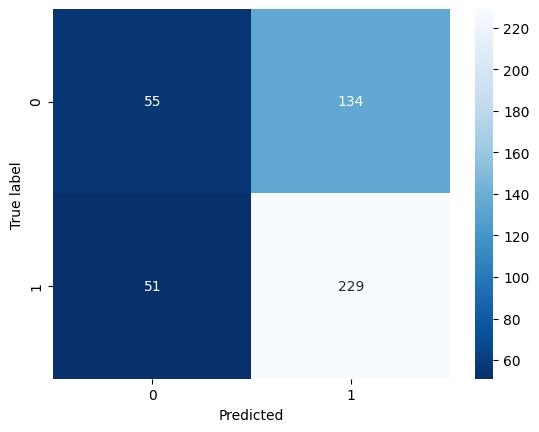

In [139]:
cm = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Подсчитаем показатели recall и precision.

In [140]:
recall = recall_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.818
precision:  0.631


Подберем порог для уменьшения ложноположительных ошибок

In [141]:
y_pred1 = (clf.predict_proba(X_test)[:,1] >= 0.5).astype(int)
y_pred2 = (clf.predict_proba(X_test)[:,1] >= 0.75).astype(int)
y_pred3 = (clf.predict_proba(X_test)[:,1] >= 0.9).astype(int)
print(y_pred1)
print(y_pred2)
print(y_pred3)

[1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 0 0 1]
[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [142]:
RANDOM_STATE = 42

X = taste_milk.drop('вкус молока', axis=1)
y = taste_milk['вкус молока']
X_train, X_test, y_train3, y_test3 = train_test_split(
    X, 
    y, 
    test_size=0.82,
    random_state=RANDOM_STATE
)

cat_col_names_ferma = ['порода', 'тип пастбища', 'имя_папы', 'спо (сахаро-протеиновое соотношение)', 'возраст']
num_col_names_ferma = ['сырой протеин, г', 'жирность,%',  'белок,%']

#One-Hot Encoding
encoder_ferma = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_ferma.fit_transform(X_train[cat_col_names_ferma])
X_test_ohe = encoder_ferma.transform(X_test[cat_col_names_ferma])

encoder_col_names_ferma = encoder_ferma.get_feature_names()
#StandardScaler
scaler_ferma = StandardScaler()
X_train_scaled = scaler_ferma.fit_transform(X_train[num_col_names_ferma])
X_test_scaled = scaler_ferma.transform(X_test[num_col_names_ferma])
#Соединим данные в единый датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names_ferma)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names_ferma)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names_ferma)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names_ferma)

X_train3 = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test3 = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#Изучаем модель логистической регресси
clf3 = LogisticRegression() # ваш код здесь

# обучаем модель на данных
clf3 = clf3.fit(X_train3, y_train3) # ваш код здесь

# получаем прогнозные метки классов
y_pred3 = clf3.predict(X_train3)

# проводим оценку точности
acc = accuracy_score(y_train3, y_pred3)

print('accuracy: ',round(acc ,3))

accuracy:  0.562


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен полностью. Но мы все равно можем улучшить модель, подобрав порог.
</div>  

Построим Confusion Matrix.

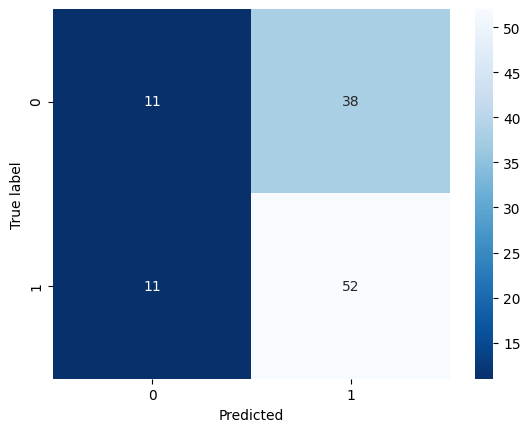

In [143]:
cm = metrics.confusion_matrix(y_train3, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Подсчитаем показатели recall и precision.

In [144]:
recall3 = recall_score(y_train3, y_pred3)
precision3 = precision_score(y_train3, y_pred3)
print('recall: ',round(recall3 ,3))
print('precision: ',round(precision3,3))

recall:  0.825
precision:  0.578


Показатель recall для нас важнее, т.к. определить нужно определить какие коровы дают вкусное молоко, в данном случае лучше определить корову как не вкусное молоко, чем корову с невкусным молоком во вкусные.

Спрогнозируем вкус молока у коров в фирме ЭКО.

In [145]:
eko = cow_buy_new.copy()
eko

,порода,тип пастбища,возраст,порода папы_быка,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%",имя_папы
0,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.58,3.076,Геркулес
1,Вис Бик Айдиал,равнинное,менее_2_лет,Айдиал,229.176376,2004,1,3.54,3.081,Буйный
2,РефлешнСоверинг,равнинное,более_2_лет,Соверин,229.176376,2004,1,3.59,3.074,Барин
3,РефлешнСоверинг,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.40,3.061,Буйный
4,РефлешнСоверинг,равнинное,более_2_лет,Айдиал,229.176376,2004,1,3.64,3.074,Буйный
5,РефлешнСоверинг,равнинное,менее_2_лет,Айдиал,229.176376,2004,1,3.63,3.053,Геркулес
6,Вис Бик Айдиал,холмистое,более_2_лет,Айдиал,237.366989,2031,1,3.58,3.076,Геркулес
7,Вис Бик Айдиал,равнинное,более_2_лет,Айдиал,229.176376,2004,1,3.57,3.079,Буйный
8,РефлешнСоверинг,равнинное,более_2_лет,Соверин,229.176376,2004,1,3.59,3.074,Барин
9,РефлешнСоверинг,холмистое,менее_2_лет,Айдиал,237.366989,2031,1,3.40,3.079,Буйный


Удалим столбцы породу папы и эке.

In [146]:
eko = eko.drop(['эке (энергетическая кормовая единица)'], axis=1)
eko = eko.drop(['порода папы_быка'], axis=1)

Закодируем показатель СПО в двоичной системе.

In [147]:
eko['спо (сахаро-протеиновое соотношение)'] = eko['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x >= 0.92 else 0)

Строим прогноз вкуса молока

In [148]:
df3 = encoder_ferma.transform(eko[cat_col_names_ferma]) 
df4 = scaler_ferma.transform(eko[num_col_names_ferma])

X_test_ohe_ferma = pd.DataFrame(df3, columns=encoder_col_names_ferma)

X_test_scaled_ferma = pd.DataFrame(df4, columns=num_col_names_ferma)

X_test = pd.concat([X_test_ohe_ferma, X_test_scaled_ferma], axis=1)
cow_buy_result['вкус молока'] = clf.predict(X_test)

In [149]:
cow_buy_result

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6313.383799,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6618.206943,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6523.901286,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6354.958045,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6504.655148,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6426.935594,1


Вернем значения "вкусно", "не вкусно".

In [150]:
cow_buy_result['вкус молока'] = cow_buy_result['вкус молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')

    Теперь нам нужно выделить коров для покупки. Требования покупателя следующие:
    - Удой больше 6000 кг.
    - Молоко должно быть вкусным.

In [151]:
cow_buy_result

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6313.383799,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6618.206943,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6523.901286,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6354.958045,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6504.655148,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6426.935594,вкусно


In [152]:
cow_buy_result = cow_buy_result.loc[(cow_buy_result['вкус молока'] == "вкусно") & (cow_buy_result['удой, кг'] > 6000)]
cow_buy_result

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6313.383799,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6523.901286,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6504.655148,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6426.935594,вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6546.229393,вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6144.270307,вкусно


В итоге нужно приобрести 13 коров, индексацию не изменял, т.к. коровы идут под определенным номером у поставщика.

При проведении прогнозирования вкуса молока было проведено следующее:
1. Удалили столбец с породой папы_быка, т.к. данные в по породе быка оставляют сомнения в верности заполнения. Для прогнозирования вкуса мы этот столбец использовать не будем, во избежания некорректности данных. 
2. Удалим эке (энергетическая кормовая единица), думаю данных достаточно без этого показателя и он будет только искажать результат. В данных поставщика этого показателя нет.
3. Закодировали вкус молока в двоичной системе для корректного расчета.
4. закодировали как категориальный признак столбец спо (сахаро-протеиновое соотношение)	

    В результате подготовки данных мы получили следующие показатели:
    - accuracy:  0.73
    - recall:  0.803
    - precision:  0.733

## Итоговые выводы

    В ходе проведения работы с данными заказчика по проггнозированию удоя и вкуса молока были проведены следующие действия:
1. Ознакомились с данными:
    - В первой таблице представлены данные о коровах в настоящее время на ферме, на текущий момент 634 коровы. Также в ней указаны такие показатели как удой, ЭКЕ (Энергетическая кормовая единица), сырой протеин, СПО (Сахаро-протеиновое соотношение), порода коровы, тип пастбища, порода папы_быка, Жирность,%, Белок,%, вкус молока, и возраст коровы.
    - Во второй таблице вывыдены отдельно данные по имени папы коровы, данные не сопадают, т.к. всего 629 строк. Нужно будет провести анализ потерянных 5 коров.
    - В третьей таблице предоставленны данные, о коровах на продажу компанией ЭКО. Всего 20 коров, с описанием породы, типа пастбища,    породы папы_быка, именем папы, жирность,%, белок,% и возрастом коровы.
2. проведена прдобработка данных:
    - Явных дубликатов было 9, из которых 5 в данных о коровах на ферме, и 4 о коровах у заводчика "Эко". Дубликаты на ферме были удалены, у заводчика оставил, т.к. это могут быть разнве коровы с одинаковыми показателями.
    - был изменен тип данных на float32. Данная проблема образовалась из-за того, что данные были подготовлены некорректно, и использовалась запятая вместо точки.
3. проведен корреляционный анализ данных:
    - Удой делится на 2 вида по сахарно-протеиновому соотношению, на тех коров которые дают до 6000 кг. молока в год и тех кто больше 6000 кг. При этом порода Вис Бик Айдиал дает большее значения соотношения, чем РефрешенСоверинг. 
    - тип пастбища у коров дающих менее 6000 кг. молока не влияет на этот показатель, в то же время как у коров дающих более 6000 кг. молока холмистое питание даст выше показатель сахарно-протеиновому соотношения.
4. проведено прогнозирование удоя:
    1. Построена модель по данным поставщика. При этом в исследовательском анализе были удалены все выбросы.
    2. Устанена нелинейная зависимость между эке (энергетическая кормовая единица) и удоем.
    3. Проведена категориальная зависмость между спо (сахаро-протеиновое соотношение) и удоем.
    4. Добавлен столбец с именем папы коровы.
    В результате мы получили коэффициент детерминации равен 0,83.
    Все коровы прошли порог для покупки 6000 кг. в год.
5. Проведено прогнозирование вкуса молока:
    - Удалили столбец с породой папы_быка, т.к. данные в по породе быка оставляют сомнения в верности заполнения. Для прогнозирования вкуса мы этот столбец использовать не будем, во избежания некорректности данных.
    - Удалим эке (энергетическая кормовая единица), думаю данных достаточно без этого показателя и он будет только искажать результат. В данных поставщика этого показателя нет.
    - Закодировали вкус молока в двоичной системе для корректного расчета.
    - закодировали как категориальный признак столбец спо (сахаро-протеиновое соотношение)
    В результате подготовки данных мы получили следующие показатели:
        - accuracy: 0.562
        - recall: 0.825
        - precision: 0.578

**Список коров проходящих по критериям удой выше 6000 кг. в год и молоко должно быть вкусное**

In [153]:
cow_buy_result

,порода,тип пастбища,порода папы_быка,имя_папы,"жирность,%","белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6313.383799,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6523.901286,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6621.288912,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6504.655148,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6260.482136,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6426.935594,вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6546.229393,вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6144.270307,вкусно
